### <h1><center>Projet 'IA et cognition</center></h1>
<h3>Équipe 3 Classe 5D1 <h3>
<ul>
  <li>Eya Loukil</li>
  <li>Hane Bhar</li>
  <li>Nour Soffelgil</li>
  <li>Omar Dahmen</li>
  <li>Yassine Ayadi</li>
  <li>Rawia Khchini</li>
</ul>

In [1]:
import PyPDF2
import string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag , word_tokenize , sent_tokenize
import pandas as pd
import spacy
import re
from autocorrect import Speller
from spacy.matcher import Matcher
import itertools
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import numpy as np
import matplotlib.pyplot as plt


# Chargez le petit modèle linguistique pour l'anglais et attribuez-le à la variable 'nlp'.
nlp = spacy.load('en_core_web_sm')

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

# Phase 1 Preprocessing

In [2]:
# objet lecteur pdf
pdfFileObj = open('PMBOK 5th.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [3]:
# nombre de pages en pdf
print(pdfReader.numPages)

616


In [4]:
#Extraction de texte à partir de pdf
#(41 pages [de 309 à 354 page] du PMBOK).
writer = PyPDF2.PdfFileWriter()
for i in range(334,380):
    my_page = pdfReader.getPage(i)
    writer.addPage(my_page)
output_filename = 'PROJECT_RISK_MANAGEMENT.pdf'
with open(output_filename, 'wb') as output:
    writer.write(output)

In [5]:
pdfFileObj = open('PROJECT_RISK_MANAGEMENT.pdf', 'rb')

In [6]:
PROJECT_RISK_MANAGEMENT = PyPDF2.PdfFileReader(pdfFileObj)
print(PROJECT_RISK_MANAGEMENT.numPages)

46


## PROJECT_RISK_MANAGEMENT

In [7]:
text=""
for i in range(0,PROJECT_RISK_MANAGEMENT.numPages):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    text=text+page.extractText()
text=text.replace("\n","")

# Extraction de Chaque processus

### PlanRiskManagement

In [8]:
PlanRiskManagement=""
for i in range(0,10):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    PlanRiskManagement=PlanRiskManagement+page.extractText()
PlanRiskManagement=PlanRiskManagement.replace("\n","")

### IdentifyRisks

In [9]:
IdentifyRisks=""
for i in range(10,19):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    IdentifyRisks=IdentifyRisks+page.extractText()
IdentifyRisks=IdentifyRisks.replace("\n","")

### PerformQualitativeRiskAnalysis

In [10]:
PerformQualitativeRiskAnalysis=""
for i in range(19,25):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    PerformQualitativeRiskAnalysis=PerformQualitativeRiskAnalysis+page.extractText()
PerformQualitativeRiskAnalysis=PerformQualitativeRiskAnalysis.replace("\n","")

### PerformQuantitativeRisk

In [11]:
PerformQuantitativeRisk=""
for i in range(24,33):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    PerformQuantitativeRisk=PerformQuantitativeRisk+page.extractText()
PerformQuantitativeRisk=PerformQuantitativeRisk.replace("\n","")

### PlanRiskResponses

In [12]:
PlanRiskResponses=""
for i in range(33,40):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    PlanRiskResponses=PlanRiskResponses+page.extractText()
PlanRiskResponses=PlanRiskResponses.replace("\n","")



### ControlRisks

In [13]:
ControlRisks=""
for i in range(40,46):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    ControlRisks=ControlRisks+page.extractText()
ControlRisks=ControlRisks.replace("\n","")


In [14]:
#dataframe pour tout les processus
df_processes=pd.DataFrame([PlanRiskManagement,IdentifyRisks,PerformQualitativeRiskAnalysis,PerformQuantitativeRisk,PlanRiskResponses,ControlRisks],columns=["processes"])
df_processes["nom_processes"]=["PlanRiskManagement","IdentifyRisks","PerformQualitativeRiskAnalysis","PerformQuantitativeRisk","PlanRiskResponses","ControlRisks"]

In [15]:
df_processes=df_processes[["nom_processes","processes"]]

In [16]:
df_processes

,nom_processes,processes
0,PlanRiskManagement,309©2013 Project Management Institute. A Guide...
1,IdentifyRisks,319©2013 Project Management Institute. A Guide...
2,PerformQualitativeRiskAnalysis,328©2013 Project Management Institute. A Guide...
3,PerformQuantitativeRisk,333©2013 Project Management Institute. A Guide...
4,PlanRiskResponses,342©2013 Project Management Institute. A Guide...
5,ControlRisks,349©2013 Project Management Institute. A Guide...


In [17]:
def clean(text):
    
    # Suppression des numéros de paragraphe
    text = re.sub('[0-9]+.[0-9]+.[0-9]+.[0-9]+\t',' ',str(text))
    text = re.sub('[0-9]+.[0-9]+.[0-9]+\t',' ',str(text))
    text = re.sub('[0-9]+.[0-9]+\t',' ',str(text))
    text = re.sub('[[0-9]+.]+\t',' ',str(text))
    text = re.sub('[0-9]+.[0-9]+.[0-9]+.[0-9]+ ',' ',str(text))
    text = re.sub('[0-9]+.[0-9]+.[0-9]+ ',' ',str(text))
    text = re.sub('[0-9]+.[0-9]+ ',' ',str(text))
    text = re.sub('[[0-9]+.]+ ',' ',str(text))
    text = re.sub('[.[0-9]+]+\t',' ',str(text))
    text = re.sub('[.[0-9]+.]+ ',' ',str(text))
    # Suppression des numéros de page
    text = re.sub('[0-9]+©2013 ',' ',str(text))
    # Suppression de l'en-tête et du pied de page
    text = re.sub('Project Management Institute.',' ',str(text))
    text = re.sub('Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction.','',str(text))
    # suppression des caractères de la nouvelle ligne
    text = re.sub('\n ',' ',str(text))
    text = re.sub('\n',' ',str(text))
    text = re.sub(':',' conceptualise ',str(text))
    text = re.sub('†','',str(text))
    # supprimer les apostrophes
    text = re.sub("™","'",text)
    text = re.sub("¥","'",text)
    text = re.sub("'s","'",str(text))
    # suppression des traits d'union
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # suppression des guillemets
    text = re.sub('\"',' ',str(text))
    text = re.sub('“',' ',str(text))
    # suppression de toute référence
    text = re.sub("[\(\[].*?[\)\]]", " ", str(text))
    text = re.sub("[ ]+"," ",str(text))
    # correction de texte
    text = re.sub("˜","fi",text)
    text = re.sub("˚","kn",text)
    text = re.sub("Š"," ",text)
    text = re.sub(","," ",text)
    text = re.sub("PMBOK®","PMBOK",text)
    text = re.sub("INTRODUCTIONINTRODUCTIONA","A",text)
    text = re.sub("PROJECT RISK MANAGEMENTPROJECT RISK MANAGEMENT"," ",text)
    text = re.sub('A Guide to the Project Management Body of Knowledge Œ Fifth Edition 11 A Guide to the Project Management Body of Knowledge Œ Fifth Edition ','A Guide to the Project Management Body of Knowledge Œ Fifth Edition ',str(text))
    text = re.sub('A Guide to the Project Management Body of Knowledge Œ Fifth Edition ',' ',str(text))
    text = re.sub("PROJECT RISK MANAGEMENT"," ",text)
    text = re.sub("Identify RisksIdentify Risks"," ",text)
    text = re.sub("Perform Qualitative Risk AnalysisPerform Qualitative Risk Analysis"," ",text)
    text = re.sub("Perform Quantitative Risk AnalysisPerform Quantitative Risk Analysis"," ",text)
    text = re.sub("Plan Risk ResponsesPlan Risk Responses"," ",text)
    text = re.sub("Control RisksControl Risks"," ",text)
    text = re.sub("Plan Risk ManagementPlan Risk Management"," ",text)
    text = re.sub('Œ','',text)
    text = re.sub('[0-9]+','',str(text))
    # supprimer les répétitions d'espace
    text = re.sub("[ ]+"," ",str(text))
    
    return text

In [18]:
#Fonction pour éliminer les ponctuations
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('', '', string.punctuation))
    return(text_no_punctuation)

In [19]:
#Fonction pour supprimer les caractères spéciaux
def remove_special(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('', '', '™ŒŠ˚˜©®œ'))
    return(text_no_punctuation)

In [20]:
spell = Speller(lang='en')

In [21]:
df_processes["processes"]=df_processes["processes"].apply(lambda s : clean(s))
df_processes["processes"]=df_processes["processes"].apply(lambda s : remove_special(s))
# Suppression des "stop words"(THE)
df_processes["processes"]=df_processes["processes"].apply(lambda s : " ".join([word for word in s.split() if word != "the" ]))

In [22]:
df_processes

,nom_processes,processes
0,PlanRiskManagement,Project Risk Management includes processes of ...
1,IdentifyRisks,is process of determining which risks may affe...
2,PerformQualitativeRiskAnalysis,is process of prioritizing risks for further a...
3,PerformQuantitativeRisk,Risk Urgency AssessmentRisks requiring near te...
4,PlanRiskResponses,is process of developing options and actions t...
5,ControlRisks,is process of implementing risk response plans...


#  Sentence Tokenization

In [23]:
#ségementation des phrases par processus
sentences_p0=sent_tokenize( df_processes["processes"][0] )
sentences_p1=sent_tokenize( df_processes["processes"][1] )
sentences_p2=sent_tokenize( df_processes["processes"][2] )
sentences_p3=sent_tokenize( df_processes["processes"][3] )
sentences_p4=sent_tokenize( df_processes["processes"][4] )
sentences_p5=sent_tokenize( df_processes["processes"][5] )
df_0=pd.DataFrame(sentences_p0,columns=["sentence"])
df_1=pd.DataFrame(sentences_p1,columns=["sentence"])
df_2=pd.DataFrame(sentences_p2,columns=["sentence"])
df_3=pd.DataFrame(sentences_p3,columns=["sentence"])
df_4=pd.DataFrame(sentences_p4,columns=["sentence"])
df_5=pd.DataFrame(sentences_p5,columns=["sentence"])
df_0["nom_process"]="PlanRiskManagement"
df_1["nom_process"]="IdentifyRisks"
df_2["nom_process"]="PerformQualitativeRiskAnalysis	"
df_3["nom_process"]="PerformQuantitativeRisk"
df_4["nom_process"]="PlanRiskResponses"
df_5["nom_process"]="ControlRisks"


In [24]:
#dataframe pour tout les phrases de chaque processus
df=df_0.append(df_1).append(df_2).append(df_3).append(df_4).append(df_5)

In [25]:
df=df[["nom_process","sentence"]]

In [26]:
df.tail()

,nom_process,sentence
69,ControlRisks,Actual outcomes of project' risks and of risk ...
70,ControlRisks,This information can help project managers to ...
71,ControlRisks,Organizational Process Assets UpdatesThe risk ...
72,ControlRisks,The organizational process assets that may be ...
73,ControlRisks,Final versions of risk register and risk manag...


In [27]:
# rendre le text en miniscule
df["sentence"]=df["sentence"].apply(lambda s : s.lower())
#suppresion des ponctuation
df["sentence"]=df["sentence"].apply(lambda s : remove_punctuation(s))
#suprression des "stop words "
df["sentence"]=df["sentence"].apply(lambda s : " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df["sentence"] = df["sentence"].apply(lambda s : " ".join([word for word in s.split() if word != "the" ]))

# Text Lemmatization and Stemming

In [28]:
# la différence entre (Lemmatization) et Stemming
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    """
    Print the results of stemmind and lemmitization using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "studies", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "very", pos = wordnet.VERB)

Stemmer: studi
Lemmatizer: study

Stemmer: veri
Lemmatizer: very



## Lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()
def lemm(s):
    l = []
    for word, tag in pos_tag(word_tokenize(s)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        lemma = lemmatizer.lemmatize(word, wntag) if wntag else word
        l.append(lemma)
    return l

In [30]:
# application de la lemmatization sur tout le text
df["sentence"]=df["sentence"].apply(lambda s : " ".join(lemm(s)))

In [31]:
df.head()

,nom_process,sentence
0,PlanRiskManagement,project risk management include process of con...
1,PlanRiskManagement,objective of project risk management be to inc...
2,PlanRiskManagement,identify risk process of determine which risk ...
3,PlanRiskManagement,perform qualitative risk analysis process of p...
4,PlanRiskManagement,perform quantitative risk analysis process of ...


### Synonyms

In [32]:
# reduire le nombre des mots avec les synonymes
def syns(s):
    l = []
    for w in nlp(s):
        syn = wordnet.synsets(w.text)
        a = w.text
        if len(syn) > 0 and w.pos_ in ['NN', 'VB']:
            a = syn[0].name().split('.')[0]
        l.append(a)
    return l

In [33]:
syn = wordnet.synsets("hi")
syn[0].name().split('.')[0]

'hello'

In [34]:
df["sentence"]=df["sentence"].apply(lambda s: " ".join(syns(s)))

# Word Tokenisation

In [35]:
#ségementation des phrases en des mots avec "word tokenize"
tokens=[word_tokenize(sent) for sent in df["sentence"]]
df["tokens"]=tokens

In [36]:
df

,nom_process,sentence,tokens
0,PlanRiskManagement,project risk management include process of con...,"[project, risk, management, include, process, ..."
1,PlanRiskManagement,objective of project risk management be to inc...,"[objective, of, project, risk, management, be,..."
2,PlanRiskManagement,identify risk process of determine which risk ...,"[identify, risk, process, of, determine, which..."
3,PlanRiskManagement,perform qualitative risk analysis process of p...,"[perform, qualitative, risk, analysis, process..."
4,PlanRiskManagement,perform quantitative risk analysis process of ...,"[perform, quantitative, risk, analysis, proces..."
...,...,...,...
69,ControlRisks,actual outcome of project risk and of risk res...,"[actual, outcome, of, project, risk, and, of, ..."
70,ControlRisks,this information can help project manager to p...,"[this, information, can, help, project, manage..."
71,ControlRisks,organizational process asset updatesthe risk m...,"[organizational, process, asset, updatesthe, r..."
72,ControlRisks,organizational process asset that may be updat...,"[organizational, process, asset, that, may, be..."


In [37]:
from nltk import bigrams , trigrams 

In [38]:
#Extraction des bigrams et trigrams
df["bigrams"]=df["tokens"].apply(lambda s : list(bigrams(s)))
df["trigrams"]=df["tokens"].apply(lambda s : list(trigrams(s)))

In [39]:
df.head()

,nom_process,sentence,tokens,bigrams,trigrams
0,PlanRiskManagement,project risk management include process of con...,"[project, risk, management, include, process, ...","[(project, risk), (risk, management), (managem...","[(project, risk, management), (risk, managemen..."
1,PlanRiskManagement,objective of project risk management be to inc...,"[objective, of, project, risk, management, be,...","[(objective, of), (of, project), (project, ris...","[(objective, of, project), (of, project, risk)..."
2,PlanRiskManagement,identify risk process of determine which risk ...,"[identify, risk, process, of, determine, which...","[(identify, risk), (risk, process), (process, ...","[(identify, risk, process), (risk, process, of..."
3,PlanRiskManagement,perform qualitative risk analysis process of p...,"[perform, qualitative, risk, analysis, process...","[(perform, qualitative), (qualitative, risk), ...","[(perform, qualitative, risk), (qualitative, r..."
4,PlanRiskManagement,perform quantitative risk analysis process of ...,"[perform, quantitative, risk, analysis, proces...","[(perform, quantitative), (quantitative, risk)...","[(perform, quantitative, risk), (quantitative,..."


### Visualizing long texts 

In [40]:
from spacy import displacy
doc=nlp(df["sentence"].values[154])
displacy.render(doc, style='dep',jupyter=True)

In [41]:
df

,nom_process,sentence,tokens,bigrams,trigrams
0,PlanRiskManagement,project risk management include process of con...,"[project, risk, management, include, process, ...","[(project, risk), (risk, management), (managem...","[(project, risk, management), (risk, managemen..."
1,PlanRiskManagement,objective of project risk management be to inc...,"[objective, of, project, risk, management, be,...","[(objective, of), (of, project), (project, ris...","[(objective, of, project), (of, project, risk)..."
2,PlanRiskManagement,identify risk process of determine which risk ...,"[identify, risk, process, of, determine, which...","[(identify, risk), (risk, process), (process, ...","[(identify, risk, process), (risk, process, of..."
3,PlanRiskManagement,perform qualitative risk analysis process of p...,"[perform, qualitative, risk, analysis, process...","[(perform, qualitative), (qualitative, risk), ...","[(perform, qualitative, risk), (qualitative, r..."
4,PlanRiskManagement,perform quantitative risk analysis process of ...,"[perform, quantitative, risk, analysis, proces...","[(perform, quantitative), (quantitative, risk)...","[(perform, quantitative, risk), (quantitative,..."
...,...,...,...,...,...
69,ControlRisks,actual outcome of project risk and of risk res...,"[actual, outcome, of, project, risk, and, of, ...","[(actual, outcome), (outcome, of), (of, projec...","[(actual, outcome, of), (outcome, of, project)..."
70,ControlRisks,this information can help project manager to p...,"[this, information, can, help, project, manage...","[(this, information), (information, can), (can...","[(this, information, can), (information, can, ..."
71,ControlRisks,organizational process asset updatesthe risk m...,"[organizational, process, asset, updatesthe, r...","[(organizational, process), (process, asset), ...","[(organizational, process, asset), (process, a..."
72,ControlRisks,organizational process asset that may be updat...,"[organizational, process, asset, that, may, be...","[(organizational, process), (process, asset), ...","[(organizational, process, asset), (process, a..."


## Named Entity Extraction PMBOK

In [42]:
def entityExtraction(rawtext):
    doc = nlp(rawtext)
    d = []
    for ent in doc.ents:
        d.append((ent.label_, ent.text))
        df_entity = pd.DataFrame(d, columns=('named entity', 'output'))
    return df_entity

In [43]:
df

,nom_process,sentence,tokens,bigrams,trigrams
0,PlanRiskManagement,project risk management include process of con...,"[project, risk, management, include, process, ...","[(project, risk), (risk, management), (managem...","[(project, risk, management), (risk, managemen..."
1,PlanRiskManagement,objective of project risk management be to inc...,"[objective, of, project, risk, management, be,...","[(objective, of), (of, project), (project, ris...","[(objective, of, project), (of, project, risk)..."
2,PlanRiskManagement,identify risk process of determine which risk ...,"[identify, risk, process, of, determine, which...","[(identify, risk), (risk, process), (process, ...","[(identify, risk, process), (risk, process, of..."
3,PlanRiskManagement,perform qualitative risk analysis process of p...,"[perform, qualitative, risk, analysis, process...","[(perform, qualitative), (qualitative, risk), ...","[(perform, qualitative, risk), (qualitative, r..."
4,PlanRiskManagement,perform quantitative risk analysis process of ...,"[perform, quantitative, risk, analysis, proces...","[(perform, quantitative), (quantitative, risk)...","[(perform, quantitative, risk), (quantitative,..."
...,...,...,...,...,...
69,ControlRisks,actual outcome of project risk and of risk res...,"[actual, outcome, of, project, risk, and, of, ...","[(actual, outcome), (outcome, of), (of, projec...","[(actual, outcome, of), (outcome, of, project)..."
70,ControlRisks,this information can help project manager to p...,"[this, information, can, help, project, manage...","[(this, information), (information, can), (can...","[(this, information, can), (information, can, ..."
71,ControlRisks,organizational process asset updatesthe risk m...,"[organizational, process, asset, updatesthe, r...","[(organizational, process), (process, asset), ...","[(organizational, process, asset), (process, a..."
72,ControlRisks,organizational process asset that may be updat...,"[organizational, process, asset, that, may, be...","[(organizational, process), (process, asset), ...","[(organizational, process, asset), (process, a..."


In [44]:
df_entity = entityExtraction(". ".join(df.sentence))
df_entity = df_entity.loc[df_entity['named entity'] != 'PERSON']
df_entity = df_entity.loc[df_entity['named entity'] != 'ORG']

In [45]:
df_entity.head()

,named entity,output
1,CARDINAL,one
2,CARDINAL,one
3,CARDINAL,three
5,CARDINAL,one
6,CARDINAL,two


### PMI Practice Standard for Project Risk Management

In [46]:
PMIpdfFileObj = open('PMIPracticeStandardforProjectRiskManagement.pdf', 'rb')

In [47]:
# objet lecteur pdf
PMIpdfReader = PyPDF2.PdfFileReader(PMIpdfFileObj)

In [48]:
# nombre de pages en pdf
print(PMIpdfReader.numPages)

128


In [49]:
#extraction du text de PMI
textPMI=""
for i in range(0,PMIpdfReader.numPages):
    page=PMIpdfReader.getPage(i)
    textPMI=textPMI+page.extractText()
textPMI=textPMI.replace("\n","")

In [50]:
textPMI_clean=clean(textPMI)
textPMI_clean=remove_special(textPMI_clean)

In [51]:
#ségementation des phrases
pmi_sent=sent_tokenize(textPMI_clean)

In [52]:
df_pmi=pd.DataFrame(pmi_sent,columns=["sentence"])

In [53]:
# rendre le text en miniscule
df_pmi["sentence"]=df_pmi["sentence"].apply(lambda s : s.lower())
# supression des punctuations 
df_pmi["sentence"]=df_pmi["sentence"].apply(lambda s : remove_punctuation(s))
# suppresion des stop words
df_pmi["sentence"]=df_pmi["sentence"].apply(lambda s : " ".join([word.text for word in nlp(s) if not word.pos_ in ["ADV"]]))
df_pmi["sentence"]=df_pmi["sentence"].apply(lambda s : " ".join([word for word in s.split() if word != "the" ]))
# Lemmatization
df_pmi["sentence"]=df_pmi["sentence"].apply(lambda s : " ".join(lemm(s)))

In [54]:
df_pmi.head()

,sentence
0,practice standard for isbn conceptualise publi...
1,phone conceptualise fax conceptualise e mail c...
2,ﬁpmiﬂ pmi logo ﬁpmpﬂ pmp logo ﬁpmbokﬂ ﬁpgmpﬂ ﬁ...
3,quarter globe design be a trademark of inc for...
4,pmi publication welcome correction and comment...


### Named Entity Extraction PMI

In [55]:
df_entity_pmi = entityExtraction(". ".join(df_pmi.sentence))
df_entity_pmi = df_entity_pmi.loc[df_entity_pmi['named entity'] != 'PERSON']
df_entity_pmi = df_entity_pmi.loc[df_entity_pmi['named entity'] != 'ORG']

In [56]:
df_entity_pmi.head()

,named entity,output
1,DATE,today
2,CARDINAL,quarter
3,GPE,po
5,GPE,america
7,CARDINAL,three


# Phase 2 

### Extraction des titres

In [57]:
# Extraction de la partie table des matieres
writer = PyPDF2.PdfFileWriter()
Context=""
for i in range(4,15):
    my_page = pdfReader.getPage(i)
    Context=Context+my_page.extractText()
Context=Context.replace("\n"," ").replace("..","")

In [58]:
# fonction pour l'extraction du text entre deux strings
def extract_text(text,startT,endT):
    start = text.find(startT) + len(startT)
    end = text.find(endT)
    substring = text[start:end]
    return substring

In [59]:
#Fonction pour éliminer les chiffres
def remove_numeric(text_original):
    text_no_numeric = text_original.translate(str.maketrans('','',string.digits))
    return(text_no_numeric)

In [60]:
#extraction des nom de processes
processes=[]
for i in range (1,7):
    processes.append(remove_numeric(extract_text(Context,"11."+str(i),"11."+str(i)+".1")).lower().replace('.','').strip())
    

In [61]:
#focntion pour extraire les sous-titre de chaque process
def extract_process_headlines(p):
    L=[]
    for i in range (1,3):
        L.append(remove_numeric(extract_text(Context,"11."+str(p)+"."+str(i),"11."+str(p)+"."+str(i+1))).lower().replace('.','').strip())
        output=remove_numeric(extract_text(Context,"11."+str(p)+'.3','11.'+str(p+1))).lower().replace('.','')
        output=extract_text(output,output[0],'outputs')
    L.append(output+"outputs")
    return L

In [62]:
#les sous titres du process plan risk management:
extract_process_headlines(1)

['plan risk management: inputs',
 'plan risk management: tools and techniques',
 'plan risk management: outputs']

In [63]:
processes

['plan risk management',
 'identify risks',
 'perform qualitative  risk analysis',
 'perform quantitative  risk analysis',
 'plan risk responses',
 'control risks']

In [64]:
#Extraction de la partie project risk mangemenet
text2=""
for i in range(0,PROJECT_RISK_MANAGEMENT.numPages):
    page=PROJECT_RISK_MANAGEMENT.getPage(i)
    text2=text2+page.extractText()
text2=text2.replace("\n","")

In [65]:
#fonction pour retourner le nombre de chaque process
def get_number(p,part):
    number=0
    K=0
    if part=="inputs":
        k=1
    elif part=="tools and techniques":
        k=2
    elif part=="outputs":
        k=3
    else:
        return 0
    for i in range(1,14):
        if '11.'+str(p)+'.'+str(k)+'.'+str(i) in text2:
            number=number+1
    return (number)

In [66]:
#plan risk management possede 5 inputs
get_number(1,'inputs')

5

In [67]:
ll=extract_text(text2,"11.1.1.2","11.1.1.3")
ll

' Project CharterDescribed in Section 4.1.3.1. The project charter can provide various inputs such as high-level risks, high-level project descriptions, and high-level requirements.'

In [68]:
#extraction du titre de la défintion 
def extract_title(annotation):
    end=re.findall(r"(\w)([A-Z])", annotation)[0][0]+re.findall(r"(\w)([A-Z])", annotation)[0][1]
    return extract_text(annotation,annotation[0],end)+re.findall(r"(\w)([A-Z])", annotation)[0][0] 

In [69]:
extract_title(ll)

'Project Charter'

In [70]:
#fonction pour extraire les titres et les annotations
def extract_process_inforamtion(p,Type):
    if Type=="inputs":
        t=1
    elif Type=="tools and techniques":
        t=2
    elif Type=="outputs":
        t=3
    N=get_number(p,Type)
    titles=[]
    annotations=[]
    for i in range(1,N):
        start="11."+str(p)+"."+str(t)+"."+str(i)
        end="11."+str(p)+"."+str(t)+"."+str(i+1)
        annotation=extract_text(text2,start,end)
        titles.append(extract_title(annotation))
        annotations.append(annotation.strip()) 
    annotation=extract_text(text2,"11."+str(p)+"."+str(t)+"."+str(N),"11."+str(p)+"."+str(t+1))
    titles.append(extract_title(annotation))
    annotations.append(annotation)
    return titles,annotations

In [71]:
text2 = re.sub('[0-9]+©2013 ',' ',str(text2))
text2 = re.sub('Licensed To: Jorge Diego Fuentes Sanchez PMI MemberID: 2399412This copy is a PMI Member benefit, not for distribution, sale, or reproduction.','',str(text))
text2 = text2.replace("Techniques Interviewing","TechniquesInterviewing")
text2 = text2.replace("A Guide to the Project Management Body of Knowledge (PMBOK® Guide) Œ Fifth Edition 11 - PROJECT RISK MANAGEMENT","")
text2 = text2.replace("Examples of Commonly Used Probability Distributions Project Management Institute.","")
text2 = text2.replace("SWOT","Swot")
# afficher les "tools and techniques" du process plan risk management
extract_process_inforamtion(1,"tools and techniques")

(['Analytical Techniques', 'Expert Judgment', 'Meetings'],
 ['Analytical TechniquesAnalytical techniques are used to understand and de˜ne the overall risk management context of the project. Risk management context is a combination of stakeholder risk attitudes and the strategic risk exposure of a given project based on the overall project context. For example, a stakeholder risk pro˜le analysis may be performed to grade and qualify the project stakeholder risk appetite and tolerance. Other techniques, such as the use of strategic risk scoring sheets, are used to provide a high-level assessment of the risk exposure of the project based on the overall project context. Depending on these assessments, the project team can allocate appropriate resources and focus on the risk management activities.',
  'Expert JudgmentTo ensure a comprehensive establishment of the risk management plan, judgment, and expertise should be considered from groups or individuals with specialized training or knowle

In [72]:
sents=sent_tokenize(text2.replace("PROJECT RISK MANAGEMENT11"," ").replace("A Guide to the Project Management Body of Knowledge (PMBOK® Guide) Œ Fifth Edition 11 -","").replace("Assumptions may be incorporated into the project scope statement or in a separate assumptions log.",""))

In [73]:
#extraction les annotations de chaque process
def extractProcessAnnotations():
    annotations=[]
    for i in range(1,7):
        annotation=""
        for sent in sents:
            if sent.startswith('11.'+str(i)+' ') or sent.startswith('.'+str(i)+' '):
                annotation=annotation+" "+sent.replace('˜','fi')  
                i=int(sents.index(sent))
                while(i>0):
                    i=i+1
                    annotation=annotation+" "+sents[i].replace('˜','fi')
                    if sents[i].startswith('The inputs, tools and techniques'):
                        i=-1
        annotations.append(annotation)
        return annotations

In [74]:
#creation du dataframe is/have (nom_process /is a /project risk managment)
dlist=[]
for p in range(0,6):
    dis_dict = {'Noun1':processes[p],'Is/Have':'is a','Noun2':'project risk management'}
    dlist.append(dis_dict)
df_title=pd.DataFrame(dlist)

In [75]:
df_title

,Noun1,Is/Have,Noun2
0,plan risk management,is a,project risk management
1,identify risks,is a,project risk management
2,perform qualitative risk analysis,is a,project risk management
3,perform quantitative risk analysis,is a,project risk management
4,plan risk responses,is a,project risk management
5,control risks,is a,project risk management


In [76]:
# creation du datframe pours les concepts et les sous concepts
dlist=[]
for p in range(0,6):
    for i in range(0,3):
        dis_dict = {'parent concept':processes[p],'conceptualise':'conceptualise','concept':extract_process_headlines(p+1)[i].replace(':','')}
        dlist.append(dis_dict)
df_Parent_Concept=pd.DataFrame(dlist)        

In [77]:
df_Parent_Concept

,parent concept,conceptualise,concept
0,plan risk management,conceptualise,plan risk management inputs
1,plan risk management,conceptualise,plan risk management tools and techniques
2,plan risk management,conceptualise,plan risk management outputs
3,identify risks,conceptualise,identify risks inputs
4,identify risks,conceptualise,identify risks tools and techniques
5,identify risks,conceptualise,identify risks outputs
6,perform qualitative risk analysis,conceptualise,perform qualitative risk analysis inputs
7,perform qualitative risk analysis,conceptualise,perform qualitative risk analysis tools and t...
8,perform qualitative risk analysis,conceptualise,perform qualitative risk analysis outputs
9,perform quantitative risk analysis,conceptualise,perform quantitative risk analysis inputs


In [78]:
extract_process_inforamtion(2,"inputs")[0]

['Risk Management Plan',
 'Cost Management Plan',
 'Schedule Management Plan',
 'Quality Management Plan',
 'Human Resource Management Plan',
 'Scope Baseline',
 'Activity Cost Estimates',
 'Activity Duration Estimates',
 'Stakeholder Register',
 'Project Documents',
 'Procurement Documents',
 'Enterprise Environmental Factors',
 'Organizational Process Assets']

In [79]:
#fonction pour la creation du dataframe is a /have a
def extract_IOTT(Filter):
    dlist=[]
    for p in range(1,7):
        N=extract_process_inforamtion(p,Filter)[0]
        for i in range(0,len(N)):
            dis_dict = {'Noun1':N[i],'Is/Have':'is a','Noun2':processes[p-1]+" "+Filter}
            dlist.append(dis_dict)
    df_IOTT=pd.DataFrame(dlist)
    return df_IOTT

In [80]:
df_IOTT=extract_IOTT("inputs").append(extract_IOTT("tools and techniques")).append(extract_IOTT("outputs"))

In [81]:
df_IOTT.head()

,Noun1,Is/Have,Noun2
0,Project Management Plan,is a,plan risk management inputs
1,Project Charter,is a,plan risk management inputs
2,Stakeholder Register,is a,plan risk management inputs
3,Enterprise Environmental Factors,is a,plan risk management inputs
4,Organizational Process Assets,is a,plan risk management inputs


In [82]:
df_title=df_title.append(df_IOTT)

In [83]:
df_title

,Noun1,Is/Have,Noun2
0,plan risk management,is a,project risk management
1,identify risks,is a,project risk management
2,perform qualitative risk analysis,is a,project risk management
3,perform quantitative risk analysis,is a,project risk management
4,plan risk responses,is a,project risk management
...,...,...,...
6,Work Performance Information,is a,control risks outputs
7,Change Requests,is a,control risks outputs
8,Project Management Plan Updates,is a,control risks outputs
9,Project Documents Updates,is a,control risks outputs


In [84]:
docPMBOK = nlp(". ".join(df.sentence))

In [85]:
# Extraction des noms PMBOK
AllNounsPMBOK=[]
for tok in docPMBOK:
    if tok.pos_=="NOUN":
        AllNounsPMBOK.append(tok.text)

In [86]:
docPMI = nlp(". ".join(df_pmi.sentence))

In [87]:
# Extraction des noms PMI
AllNounsPMI=[]
for tok in docPMI:
    if tok.pos_=="NOUN":
        AllNounsPMI.append(tok.text)

In [88]:
# fonction de recherche des synonymes
def find_synonym_ontology(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            synonyms.append(lm.name())
    return list(set(synonyms))

In [89]:
# Examples
print("Synonyms of project : ", find_synonym_ontology("project"))
print("Synonyms of management: ", find_synonym_ontology("management"))
print("Synonyms of change: ", find_synonym_ontology("risk"))

Synonyms of project :  ['plan', 'externalise', 'image', 'project', 'jut', 'fancy', 'visualise', 'cast', 'throw', 'jut_out', 'externalize', 'propose', 'see', 'projection', 'envision', 'labor', 'picture', 'design', 'protrude', 'contrive', 'send_off', 'undertaking', 'stick_out', 'figure', 'visualize', 'task']
Synonyms of management:  ['management', 'direction']
Synonyms of change:  ['risk_of_infection', 'risk', 'put_on_the_line', 'take_chances', 'adventure', 'take_a_chance', 'hazard', 'endangerment', 'chance', 'lay_on_the_line', 'run_a_risk', 'risk_of_exposure', 'gamble', 'peril', 'danger', 'jeopardy']


In [90]:
# fonction de recherche des synonymes dans le PMBOK
def synonymConceptOntoPMB(term):
    if term not in AllNounsPMBOK :
        return []
    else :
        syno_list=[]
        temp_list=[]
        syno_list = find_synonym_ontology(term)
        if len(syno_list) != 0 :
            for syno  in syno_list :
                if syno in AllNounsPMBOK  and syno != term :
                    temp_list.append(syno)
                    
        return temp_list

### Find synonym in PBMOK

In [91]:
print("Synonym of project in our ontology :", synonymConceptOntoPMB('project'))
print("Synonym of risk in our ontology :", synonymConceptOntoPMB('risk'))
print("Synonym of management in our ontology :", synonymConceptOntoPMB('management'))

Synonym of project in our ontology : ['plan', 'projection', 'design', 'figure']
Synonym of risk in our ontology : ['jeopardy']
Synonym of management in our ontology : []


In [92]:
# fonction de recherche des synonymes dans le PMI
def synonymConceptintoPMI(term):
    if term not in AllNounsPMBOK :
        return [] 
    else :
        syno_list=[]
        temp_list=[]
        syno_list = find_synonym_ontology(term)
        if len(syno_list) != 0 :
            for syno  in syno_list :
                if syno in AllNounsPMI  and syno != term and (syno not in synonymConceptOntoPMB(term)) :
                    temp_list.append(syno)                    
        return temp_list

### Find synonym in PMI

In [93]:
print("Synonym of project in PMI :", synonymConceptintoPMI('project'))
print("Synonym of project in our ontology :", synonymConceptOntoPMB('project'))

Synonym of project in PMI : ['image', 'propose', 'see', 'picture', 'undertaking', 'task']
Synonym of project in our ontology : ['plan', 'projection', 'design', 'figure']


### EXTRACTION DES RÉGLES

In [94]:
#spacy matching
def Y_X(doc):
    m = []
    #défintion des patternes
    pattern = [{'DEP':'compound', 'OP':"*"},
               {'POS':'NOUN'},
               {'LOWER': 'such'},
               {'LOWER': 'as'},
               {'DEP':'compound', 'OP':"*"},
               {'POS': 'NOUN'}
              ]
    pattern2 = [{'DEP':'compound', 'OP':"*"},
               {'POS':'NOUN'},
               {'LOWER': 'like'},
               {'DEP':'compound', 'OP':"*"},
               {'POS': 'NOUN'}
              ]
    pattern3 = [{'DEP':'compound', 'OP':"*"},
               {'POS':'NOUN'},
               {'LOWER': 'including'},
               {'DEP':'compound', 'OP':"*"},
               {'POS': 'NOUN'}
              ]
    matcher = Matcher(nlp.vocab)
    matcher.add("matching_1",[pattern,pattern2,pattern3],on_match=None)
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    for span in spacy.util.filter_spans(spans):
        m.append(re.split('( such as )',span.text))
    df_m = pd.DataFrame(m,columns=['Y','Relation','X'])
    return df_m

### 

In [95]:
doc1 = nlp(". ".join(df[df["nom_process"]=="PlanRiskManagement"].sentence))
doc2 = nlp(". ".join(df[df["nom_process"]=="IdentifyRisks"].sentence))
doc3 = nlp(". ".join(df[df["nom_process"]=="PerformQualitativeRiskAnalysis"].sentence))
doc4 = nlp(". ".join(df[df["nom_process"]=="PerformQuantitativeRisk"].sentence))
doc5 = nlp(". ".join(df[df["nom_process"]=="PlanRiskResponses"].sentence))
doc6 = nlp(". ".join(df[df["nom_process"]=="ControlRisks"].sentence))

In [96]:
Y_X(docPMI).head()

,Y,Relation,X
0,forum,such as,handbook
1,environment,such as,stakeholder scope time
2,efkn ciencies,such as,address
3,risk relate feature,such as,cause
4,technique,such as,estimate plan cost control task allocation


In [97]:
# fonction pour enrichir les régles "spacy matching relation" de PMI
def Y_X_enrichementPMI(docPMI):
    m=[]
    for X,Y in itertools.zip_longest(Y_X(docPMI).X, Y_X(docPMI).Y):
        if(len(synonymConceptOntoPMB(Y))+len(synonymConceptOntoPMB(X)) > 0):
            s=spell(Y)+" such as "+spell(X)
            m.append(re.split('( such as )',s))
    df_m = pd.DataFrame(m,columns=['Y','Relation','X'])
    return df_m    

In [98]:
df_Y_X=Y_X(docPMBOK).append(Y_X_enrichementPMI(docPMI)).drop_duplicates().reset_index(drop=True)

In [99]:
df_Y_X.head()

,Y,Relation,X
0,project objective,such as,scope schedule cost
1,technique,such as,use
2,term,such as,level
3,factor,such as,time frame
4,assessment,such as,conceptualise industry study


In [100]:
df_Parent_Concept.head()

,parent concept,conceptualise,concept
0,plan risk management,conceptualise,plan risk management inputs
1,plan risk management,conceptualise,plan risk management tools and techniques
2,plan risk management,conceptualise,plan risk management outputs
3,identify risks,conceptualise,identify risks inputs
4,identify risks,conceptualise,identify risks tools and techniques


In [101]:
df_Parent_Concept

,parent concept,conceptualise,concept
0,plan risk management,conceptualise,plan risk management inputs
1,plan risk management,conceptualise,plan risk management tools and techniques
2,plan risk management,conceptualise,plan risk management outputs
3,identify risks,conceptualise,identify risks inputs
4,identify risks,conceptualise,identify risks tools and techniques
5,identify risks,conceptualise,identify risks outputs
6,perform qualitative risk analysis,conceptualise,perform qualitative risk analysis inputs
7,perform qualitative risk analysis,conceptualise,perform qualitative risk analysis tools and t...
8,perform qualitative risk analysis,conceptualise,perform qualitative risk analysis outputs
9,perform quantitative risk analysis,conceptualise,perform quantitative risk analysis inputs


### Subject-Predicate-Object Rule with Compound Nouns

In [102]:
def rule2_mod(text,index):
    doc = nlp(text)
    phrase = ''
    for token in doc:
        if token.i == index:
            for subtoken in token.children:
                if (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
            break
    return phrase

In [103]:
def rule1_mod(text):
    doc = nlp(text)
    sent = []
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            #phrase =''
            ph = []
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    phrase =''
                    # look for subject modifier
                    adj = rule2_mod(text,sub_tok.i)
                    phrase += adj + sub_tok.text
                    ph.append(phrase)
                    # save the root word of the word
                    #phrase += ' '+token.text#.lemma_
                    ph.append(token.text)
                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        if (sub_tok.dep_ in ['dobj','pobj']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                            phrase =''
                            # look for object modifier
                            adj = rule2_mod(text,sub_tok.i)
                            phrase += adj+sub_tok.text
                            ph.append(phrase)
                            sent.append(ph)
    return sent

In [104]:
def SubjectPredicateObje(df):
    row_list = []
    for i in range(len(df)):
        sent = df.sentence.values[i]
        output = rule1_mod(sent)
        dict1 = {'Sentence':sent,'Output':output}
        row_list.append(dict1)
    
    df_rule = pd.DataFrame(row_list)
    df_show = pd.DataFrame(columns=df_rule.columns)

    for row in range(len(df_rule)):
        if len(df_rule.loc[row,'Output'])!=0:
            df_show = df_show.append(df_rule.loc[row,:])

    # reset the index
    df_show.reset_index(inplace=True)
    df_show.drop('index',axis=1,inplace=True)    

    # separate subject, verb and object
    verb_dict = dict()
    dis_dict = dict()
    dis_list = []

    # iterating over all the sentences
    for i in range(len(df_show)):
        # sentence containing the output
        sentence = df_show.loc[i,'Sentence']
        # output of the sentence
        output = df_show.loc[i,'Output']
        # iterating over all the outputs from the sentence
        for sent in output:
            # separate subject, verb and object
            #n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]
            n1, v, n2 = sent[:1], sent[1], sent[2:]
            # append to list, along with the sentence
            dis_dict = {'Sentence':sentence,'Subject':n1,'Predicate':v,'Object':n2}
            dis_list.append(dis_dict)
            # counting the number of sentences containing the verb
            #verb = sent.split()[1]
            verb = sent[1]
            if verb in verb_dict:
                verb_dict[verb]+=1
            else:
                verb_dict[verb]=1

    df_sep = pd.DataFrame(dis_list)
    row_list = []
    row_list2 = []

    for i in range(len(df_sep)):
        sent = df_sep.loc[i,'Subject']
        s = " ".join(sent)
        row_list.append(s)
        sent = df_sep.loc[i,'Object']
        s = " ".join(sent)
        row_list2.append(s)
    
    df_sep['Subject'] = row_list
    df_sep['Object'] = row_list2
    
    return df_sep

In [105]:
df_sep_pmbok=SubjectPredicateObje(df)

In [106]:
df_sep_pmi=SubjectPredicateObje(df_pmi)

In [107]:
df_sep_pmbok.head()

,Sentence,Subject,Predicate,Object
0,project risk management include process of con...,project risk management,include,process
1,identify risk process of determine which risk ...,risk,affect,project
2,a risk may have one or more cause and if it oc...,risk,have,cause
3,a risk may have one or more cause and if it oc...,it,have,impact
4,for example cause could include requirement of...,cause,include,requirement


In [108]:
df_sep_pmi.head()

,Sentence,Subject,Predicate,Object
0,phone conceptualise fax conceptualise e mail c...,fax conceptualise internet,conceptualise,wwwpmiorg inc reserve
1,phone conceptualise fax conceptualise e mail c...,fax conceptualise internet,conceptualise,wwwpmiorg inc reserve
2,ﬁpmiﬂ pmi logo ﬁpmpﬂ pmp logo ﬁpmbokﬂ ﬁpgmpﬂ ﬁ...,pmi logo,ﬁpmbokﬂ,ﬁpgmpﬂ ﬁproject management ﬁpmpﬂ pmp logo ﬁpmb...
3,ﬁpmiﬂ pmi logo ﬁpmpﬂ pmp logo ﬁpmbokﬂ ﬁpgmpﬂ ﬁ...,pmi logo,ﬁpmbokﬂ,ﬁpgmpﬂ ﬁproject management ﬁpmpﬂ pmp logo ﬁpmb...
4,this process bring volunteer andor seek out vi...,process,bring,volunteer andor


In [109]:
df_sep_pmbok.columns

Index(['Sentence', 'Subject', 'Predicate', 'Object'], dtype='object')

In [110]:
# fonction pour enrichir les régles "Subject,Predicate,Object" de PMI
def SPO_enrichment(df):
    m=[]
    for Sentence,Subject,Object,Predicate in itertools.zip_longest(df.Sentence,df.Subject, df.Object,df.Predicate):
        if(len(synonymConceptOntoPMB(Subject))+len(synonymConceptOntoPMB(Object)) > 0):
                s=[]
                s.append(Sentence)
                s.append(spell(Subject))
                s.append(spell(Predicate))
                s.append(spell(Object))
                m.append(s)
                df_co = pd.DataFrame(m,columns=['Sentence','Subject','Predicate','Object'])

    return df_co

In [111]:
df_spo=df_sep_pmbok.append(SPO_enrichment(df_sep_pmi)).drop_duplicates().reset_index(drop=True)

In [112]:
len(df_spo)

311

In [113]:
df_spo

,Sentence,Subject,Predicate,Object
0,project risk management include process of con...,project risk management,include,process
1,identify risk process of determine which risk ...,risk,affect,project
2,a risk may have one or more cause and if it oc...,risk,have,cause
3,a risk may have one or more cause and if it oc...,it,have,impact
4,for example cause could include requirement of...,cause,include,requirement
...,...,...,...,...
306,process of implement risk response plan track ...,process,monitor,risk ed risk monitor risk
307,a category may include subcategories such as t...,category,include,subcategories
308,a measure of overall project risk describe ove...,measure,describe,effect
309,a representation of project include data about...,representation,include,data


### "Is A/ Have A" Rule

In [114]:
def rule4(text):
    doc = nlp(text)
    sent = []
    for token in doc:
        # if the token is a verb
        if (token.text in ['have','be','may','cloud','can','should','will']):
            ph =[]
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                if (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    phrase =''
                    # add subject to the phrase
                    adj = rule2_mod(text,sub_tok.i)
                    phrase += adj + sub_tok.text
                    ph.append(phrase)
                    # save the root of the verb in phrase
                    #phrase += ' '+token.text#.lemma_
                    ph.append(token.text)
                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        # save the object in the phrase
                        if (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                            phrase =''
                            adj = rule2_mod(text,sub_tok.i)
                            phrase += adj+sub_tok.text
                            ph.append(phrase)
                            sent.append(ph)
            
    return sent

In [115]:
def RuleIsaHavea(df):
    row_list = []
    for i in range(len(df)):
        sent = df.sentence.values[i]
        output = rule4(sent)
        dict1 = {'Sentence':sent,'Output':output}
        row_list.append(dict1)
    df_rule4_all = pd.DataFrame(row_list)
    df_show4 = pd.DataFrame(columns=df_rule4_all.columns)
    for row in range(len(df_rule4_all)):
        if len(df_rule4_all.loc[row,'Output'])!=0:
            df_show4 = df_show4.append(df_rule4_all.loc[row,:])
    # reset the index
    df_show4.reset_index(inplace=True)
    df_show4.drop('index',axis=1,inplace=True)
    prep_dict = dict()
    dis_dict = dict()
    dis_list = []
    # iterating over all the sentences
    for i in range(len(df_show4)):
        # sentence containing the output
        sentence = df_show4.loc[i,'Sentence']
        # output of the sentence
        output = df_show4.loc[i,'Output']
        # iterating over all the outputs from the sentence
        for sent in output:
            # separate subject, verb and object
            n1, p, n2 = sent[:1], sent[1], sent[2:]
            # append to list, along with the sentence
            dis_dict = {'Sentence':sentence,'Noun1':n1,'Is/Have':p,'Noun2':n2}
            dis_list.append(dis_dict)
            # counting the number of sentences containing the verb
            prep = sent[1]
            if prep in prep_dict:
                prep_dict[prep]+=1
            else:
                prep_dict[prep]=1
    df_sep4= pd.DataFrame(dis_list)
    df_sep4['Is/Have'] = df_sep4['Is/Have'].replace('have','has a')
    df_sep4['Is/Have'] = df_sep4['Is/Have'].replace('be','is a')
    row_list = []
    row_list2 = []

    for i in range(len(df_sep4)):
        sent = df_sep4.loc[i,'Noun1']
        s = " ".join(sent)
        row_list.append(s)
        sent = df_sep4.loc[i,'Noun2']
        s = " ".join(sent)
        row_list2.append(s)

    df_sep4['Noun1'] = row_list
    df_sep4['Noun2'] = row_list2
    return df_sep4
    

In [116]:
df_pmi_IsaHavea=RuleIsaHavea(df_pmi)
df_pmbok_IsaHavea=RuleIsaHavea(df)

In [117]:
df_pmi_IsaHavea.head()

,Sentence,Noun1,Is/Have,Noun2
0,ﬁpmiﬂ pmi logo ﬁpmpﬂ pmp logo ﬁpmbokﬂ ﬁpgmpﬂ ﬁ...,logo,is a,register
1,quarter globe design be a trademark of inc for...,globe design,is a,trademark
2,this process bring volunteer andor seek out vi...,who,has a,interest
3,pmi have no power nor do it undertake to polic...,pmi,has a,power
4,schematic representation of monitor and contro...,representation,is a,guide practice standard be guide


In [118]:
df_pmbok_IsaHavea.head()

,Sentence,Noun1,Is/Have,Noun2
0,project risk be an uncertain event or conditio...,project risk,is a,event
1,a risk may have one or more cause and if it oc...,risk,has a,cause
2,a risk may have one or more cause and if it oc...,it,has a,impact
3,a cause may be a give or potential requirement...,cause,is a,requirement assumption constraint
4,risk threshold which refers to measure along l...,stakeholder,has a,interest


In [119]:
# enrichir les régles "is/have a" de PMI
def IsaHaveaPmiEnrichment(df):
    m=[]
    for Sentence,Noun1,relation,Noun2 in itertools.zip_longest(df.Sentence,df.Noun1, df["Is/Have"],df.Noun2):
        if(len(synonymConceptOntoPMB(Noun1))+len(synonymConceptOntoPMB(Noun2)) > 0):
                s=[]
                s.append(Sentence)
                s.append(spell(Noun1))
                s.append(spell(relation))
                s.append(spell(Noun2))
                m.append(s)
                df_sep = pd.DataFrame(m,columns=['Sentence','Noun1','Is/Have','Noun2'])

    return df_sep

In [120]:
df_IsaHavea=df_pmbok_IsaHavea.append(IsaHaveaPmiEnrichment(df_pmi_IsaHavea)).drop_duplicates().reset_index(drop=True)

In [121]:
df_IsaHavea

,Sentence,Noun1,Is/Have,Noun2
0,project risk be an uncertain event or conditio...,project risk,is a,event
1,a risk may have one or more cause and if it oc...,risk,has a,cause
2,a risk may have one or more cause and if it oc...,it,has a,impact
3,a cause may be a give or potential requirement...,cause,is a,requirement assumption constraint
4,risk threshold which refers to measure along l...,stakeholder,has a,interest
...,...,...,...,...
233,what be status of action,what,is a,status
234,d variance analysis formula in earned value an...,analysis formula,is a,use
235,assumption be factor that for planning purpose...,assumption,is a,factor
236,risk breakdown structure be tailor to speciþ c...,breakdown structure,is a,tailor


In [122]:
df_Y_X.head()

,Y,Relation,X
0,project objective,such as,scope schedule cost
1,technique,such as,use
2,term,such as,level
3,factor,such as,time frame
4,assessment,such as,conceptualise industry study


In [123]:
df_Parent_Concept.head()

,parent concept,conceptualise,concept
0,plan risk management,conceptualise,plan risk management inputs
1,plan risk management,conceptualise,plan risk management tools and techniques
2,plan risk management,conceptualise,plan risk management outputs
3,identify risks,conceptualise,identify risks inputs
4,identify risks,conceptualise,identify risks tools and techniques


In [124]:
df_IsaHavea.head()

,Sentence,Noun1,Is/Have,Noun2
0,project risk be an uncertain event or conditio...,project risk,is a,event
1,a risk may have one or more cause and if it oc...,risk,has a,cause
2,a risk may have one or more cause and if it oc...,it,has a,impact
3,a cause may be a give or potential requirement...,cause,is a,requirement assumption constraint
4,risk threshold which refers to measure along l...,stakeholder,has a,interest


In [125]:
df_spo.head()

,Sentence,Subject,Predicate,Object
0,project risk management include process of con...,project risk management,include,process
1,identify risk process of determine which risk ...,risk,affect,project
2,a risk may have one or more cause and if it oc...,risk,have,cause
3,a risk may have one or more cause and if it oc...,it,have,impact
4,for example cause could include requirement of...,cause,include,requirement


### Remove outliners

In [126]:
df_IsaHavea = df_IsaHavea[df_IsaHavea['Noun1'].str.len() < 25 ][~df_IsaHavea['Noun1'].isin(['it','there','they']) ].drop_duplicates().reset_index(drop = True)
df_IsaHavea = df_IsaHavea[df_IsaHavea['Noun2'].str.len() < 25 ][~df_IsaHavea['Noun2'].isin(['it','there','they']) ].drop_duplicates().reset_index(drop = True)

df_spo = df_spo[df_spo['Subject'].str.len() < 25][~df_spo['Subject'].isin(['it','there','they'])].drop_duplicates().reset_index(drop = True)
df_spo = df_spo[df_spo['Object'].str.len() < 25][~df_spo['Object'].isin(['it','there','they'])].drop_duplicates().reset_index(drop = True)

df_Y_X = df_Y_X[df_Y_X['X'].str.len() < 25][~df_Y_X['X'].isin(['it','there','they'])].drop_duplicates().reset_index(drop = True)
df_Y_X = df_Y_X[df_Y_X['Y'].str.len() < 25][~df_Y_X['Y'].isin(['it','there','they'])].drop_duplicates().reset_index(drop = True)



In [127]:
df_IsaHavea = df_IsaHavea.append(df_title).drop_duplicates().reset_index(drop = True)

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [frame.py:7138]


In [128]:
df_IsaHavea=df_IsaHavea.fillna("")
df_IsaHavea=df_IsaHavea[["Sentence","Noun1","Is/Have","Noun2"]]

In [129]:
df_IsaHavea["Noun1"]=df_IsaHavea["Noun1"].apply(lambda s : s.lower())
df_IsaHavea["Noun2"]=df_IsaHavea["Noun2"].apply(lambda s : s.lower())

In [130]:
df_IsaHavea

,Sentence,Noun1,Is/Have,Noun2
0,project risk be an uncertain event or conditio...,project risk,is a,event
1,a risk may have one or more cause and if it oc...,risk,has a,cause
2,risk threshold which refers to measure along l...,stakeholder,has a,interest
3,risk management plan be vital to communicate w...,management process,is a,support
4,input tool and technique and output of this pr...,input tool,is a,depict
...,...,...,...,...
278,,work performance information,is a,control risks outputs
279,,change requests,is a,control risks outputs
280,,project management plan updates,is a,control risks outputs
281,,project documents updates,is a,control risks outputs


### Chunking with NLTK

In [131]:
tokens=[]
for i in range(0,len(df)):
    tokens=tokens+df.tokens.values[i]

In [132]:
tags=nltk.pos_tag(tokens)

In [133]:
import nltk
#"NP:{<DT>?<JJ>*<NN>}"
grammar="Chunk:{<NN.?><VB.?><JJ>*<NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
chunked = chunkParser.parse(tags)


In [134]:
[ i for i in chunked  if type(i)==type(chunked[2])][:10]

[Tree('Chunk', [('management', 'NN'), ('include', 'VBP'), ('process', 'NN')]),
 Tree('Chunk', [('plan', 'NN'), ('risk', 'VBP'), ('management', 'NN')]),
 Tree('Chunk', [('plan', 'NN'), ('risk', 'VBP'), ('responses', 'NNS')]),
 Tree('Chunk', [('risk', 'NN'), ('identify', 'VBP'), ('new', 'JJ'), ('risk', 'NN')]),
 Tree('Chunk', [('project', 'NN'), ('know', 'VBP'), ('risk', 'NN')]),
 Tree('Chunk', [('risk', 'NN'), ('know', 'VBP'), ('risk', 'NN')]),
 Tree('Chunk', [('risk', 'NN'), ('represent', 'VBP'), ('effect', 'NN')]),
 Tree('Chunk', [('negativeorganizations', 'NNS'), ('perceive', 'VBP'), ('risk', 'NN')]),
 Tree('Chunk', [('risk', 'NN'), ('threshold', 'VBD'), ('organization', 'NN')]),
 Tree('Chunk', [('risk', 'NN'), ('threshold', 'VBD'), ('organization', 'NN')])]

### English Stop words

In [135]:
stop_words = set(stopwords.words("english"))
#print(stop_words)

In [136]:
def removeStopWords(tokens):
    return [token for token in tokens if token  not in stop_words]

In [137]:
#Suppression des STOP WORDS
df["tokens"]=df["tokens"].apply(lambda s : removeStopWords(s))

## Retrieval Proceess Evaluation

### TFIDF Measure

In [138]:
processed_docs = df.tokens
dct = Dictionary(processed_docs)
print(dct)

Dictionary(1228 unique tokens: ['analysis', 'conduct', 'control', 'identification', 'include']...)


In [139]:
bow_corpus = [dct.doc2bow(doc) for doc in processed_docs]
df_corpus = pd.DataFrame(np.array(bow_corpus[0])[:,1], index = np.unique(df.tokens.values[0]), columns=['Frequency'])
df_corpus

,Frequency
analysis,1
conduct,1
control,1
identification,1
include,1
management,2
plan,1
planning,1
process,1
project,2


In [140]:
bow_doc_0 = bow_corpus[0]
for i in range(11):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dct[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("analysis") appears 1 time.
Word 1 ("conduct") appears 1 time.
Word 2 ("control") appears 1 time.
Word 3 ("identification") appears 1 time.
Word 4 ("include") appears 1 time.
Word 5 ("management") appears 2 time.
Word 6 ("plan") appears 1 time.
Word 7 ("planning") appears 1 time.
Word 8 ("process") appears 1 time.
Word 9 ("project") appears 2 time.
Word 10 ("response") appears 1 time.


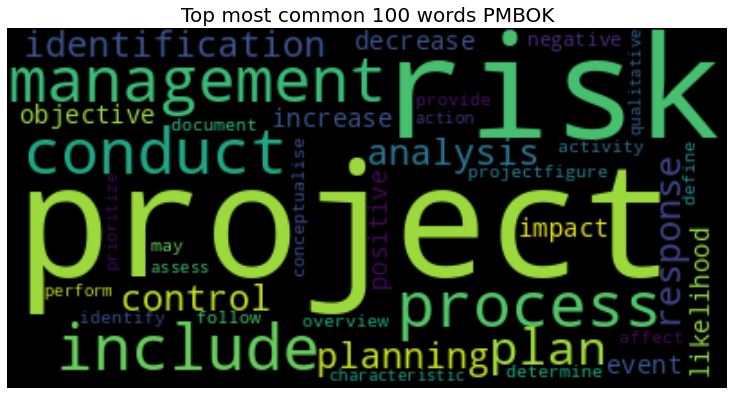

In [141]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in tokens[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words PMBOK",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('PMBOK_cost_time_scop_top_100.jpeg')

In [142]:
model_tfidf = TfidfModel(bow_corpus,normalize=True)

In [143]:
corpus_tfidf = model_tfidf[bow_corpus]
df_tfidf = pd.DataFrame(np.array(corpus_tfidf[0])[:,1], index = np.unique(df.tokens.values[0]), columns=['TFIDF'])
df_tfidf

,TFIDF
analysis,0.200100
conduct,0.420857
control,0.331332
identification,0.385770
include,0.219832
management,0.335094
plan,0.168295
planning,0.420857
process,0.179440
project,0.225763


Text(0.5, 1.0, 'TFIDF Model')

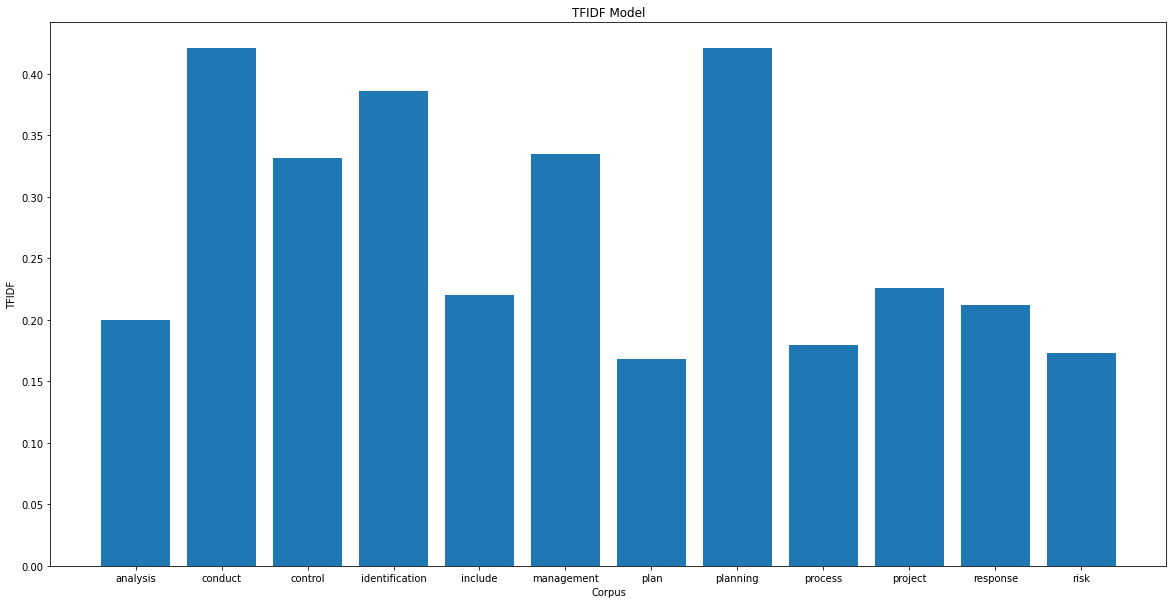

In [144]:
f, ax = plt.subplots(figsize=(20,10))
plt.bar(list(df_tfidf.index.values), list(df_tfidf.TFIDF.values))
plt.xlabel('Corpus')
plt.ylabel('TFIDF')
plt.title('TFIDF Model')

# Phase 4 OWL Extraction

## Entities Organization (Concepts/Individuals/Properties/Attributes)

### Extract concepts and individuals from named entities

In [145]:
df_entity=df_entity.append(df_entity_pmi)

In [146]:
df_entity.head()

,named entity,output
1,CARDINAL,one
2,CARDINAL,one
3,CARDINAL,three
5,CARDINAL,one
6,CARDINAL,two


In [147]:
df_concept = df_entity[['named entity']].drop_duplicates().reset_index(drop=True)
df_concept['concept'] = df_concept['named entity'].str.lower()
df_concept = df_concept.drop(['named entity'], axis=1).drop_duplicates().reset_index(drop=True)
df_concept

,concept
0,cardinal
1,ordinal
2,date
3,gpe
4,norp
5,loc
6,product
7,money


In [148]:
df_individual = df_entity.drop_duplicates().reset_index(drop=True)
df_individual['concept'] = df_individual['named entity'].str.lower()
df_individual['individual'] = df_individual['output'].str.lower()
df_individual = df_individual.drop(['named entity','output'], axis=1).sort_values('concept').drop_duplicates().reset_index(drop=True)
df_individual.head()

,concept,individual
0,cardinal,one
1,cardinal,three
2,cardinal,two
3,cardinal,four
4,cardinal,million


### Extract concepts and individuals from Spacy Matching

In [149]:
df_ind2 = df_Y_X[['X','Y']].drop_duplicates().reset_index(drop=True).rename(columns={'X':'individual','Y':'concept'})
df_con2 = df_ind2[['concept']].drop_duplicates().reset_index(drop=True)

In [150]:
df_ind2.head()

,individual,concept
0,scope schedule cost,project objective
1,use,technique
2,level,term
3,time frame,factor
4,schedule,project objective


In [151]:
df_con2.head()

,concept
0,project objective
1,technique
2,term
3,factor
4,value


In [152]:
df_concept = df_concept.append([df_con2]).drop_duplicates().reset_index(drop=True)
df_individual = df_individual.append([df_ind2]).drop_duplicates().reset_index(drop=True)

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [frame.py:7138]


In [153]:
df_concept.head()

,concept
0,cardinal
1,ordinal
2,date
3,gpe
4,norp


In [154]:
df_individual.head()

,concept,individual
0,cardinal,one
1,cardinal,three
2,cardinal,two
3,cardinal,four
4,cardinal,million


### Extract concepts and sub-concepts from Rule "is a"

In [155]:
df_csc = df_IsaHavea[df_IsaHavea['Is/Have']=='is a'][['Noun1','Noun2']].drop_duplicates().reset_index(drop=True).rename(columns={'Noun1':'concept','Noun2':'parent concept'})
df_con3 = df_csc[['concept']].drop_duplicates().reset_index(drop=True)
df_con32 = df_csc[['parent concept']].rename(columns={'parent concept':'concept'}).drop_duplicates().reset_index(drop=True)
df_ind3 = df_csc[df_csc['concept'].isin(df_individual['individual'])].drop_duplicates().reset_index(drop=True).rename(columns={'concept':'individual','parent concept':'concept'})
df_csc = df_csc[~df_csc['concept'].isin(df_individual['individual'])][['concept','parent concept']].drop_duplicates().reset_index(drop=True).append([df_Parent_Concept]).drop_duplicates().reset_index(drop=True)

In [156]:
df_csc.tail()

,concept,conceptualise,parent concept
266,plan risk responses tools and techniques,conceptualise,plan risk responses
267,plan risk responses outputs,conceptualise,plan risk responses
268,control risks inputs,conceptualise,control risks
269,control risks tools and techniques,conceptualise,control risks
270,control risks outputs,conceptualise,control risks


In [157]:
df_concept = df_concept.append([df_con3,df_con32]).drop_duplicates().reset_index(drop=True)
df_individual = df_individual.append([df_ind3]).drop_duplicates().reset_index(drop=True)

### Extract data properties and object properties from Rule "Subject Predicate Object"

A Predicate B -> if A and B are individuals then Predicate is an object property

A Predicate B -> if A is an individual and B is not then Predicate is a data property

if A Predicate B, A Predicate C and B and C are Individuals then B et C have the same type(concept)

In [158]:
df_have = df_IsaHavea[df_IsaHavea['Is/Have']=='has a'].drop_duplicates().reset_index(drop=True).rename(columns={'Noun1':'Subject','Noun2':'Object','Is/Have':'Predicate'})
df_have['Predicate'] = 'have'
df_sep = df_spo.append([df_have]).drop_duplicates().reset_index(drop=True)
df_pred = df_sep[df_sep['Subject'].isin(df_individual['individual'])]
df_pred = df_pred[df_pred['Subject'] != 'it'].drop_duplicates().reset_index(drop=True)
df_pred.head()

,Sentence,Subject,Predicate,Object
0,for example cause could include requirement of...,cause,include,requirement
1,continuous probability distribution which be u...,probability distribution,represent,uncertainty
2,these outcome may include identification of ne...,outcome,include,identification
3,outcome can include closing risk that be appli...,outcome,include,closing risk
4,over time level of project risk exposure chang...,level,take,project


In [159]:
df_objprop = df_pred[df_pred['Object'].isin(df_individual['individual'])].reset_index(drop=True)
#df_objprop.head()

In [160]:
df_rest = df_pred[~df_pred['Object'].isin(df_individual['individual'])].reset_index(drop=True)
df_rest.head()

,Sentence,Subject,Predicate,Object
0,for example cause could include requirement of...,cause,include,requirement
1,continuous probability distribution which be u...,probability distribution,represent,uncertainty
2,these outcome may include identification of ne...,outcome,include,identification
3,outcome can include closing risk that be appli...,outcome,include,closing risk
4,over time level of project risk exposure chang...,level,take,project


In [161]:
df_newind= df_rest[df_rest['Subject'].isin(df_objprop['Subject']) & df_rest['Predicate'].isin(df_objprop['Predicate'])].reset_index(drop=True)

In [162]:
row_list = []
for i in range(len(df_newind)):
    for j in range(len(df_objprop)):
        if df_newind.loc[i,'Subject'] == df_objprop.loc[j,'Subject'] and df_newind.loc[i,'Predicate'] == df_objprop.loc[j,'Predicate']:
            concept = df_objprop.loc[j,'Object']
            row_list.append([df_newind.loc[i,'Object'],concept])

df_temp = pd.DataFrame(row_list,columns=['individual','concept'])
df_individual = df_individual.append([df_temp]).drop_duplicates(subset='individual',keep='last').reset_index(drop=True)

In [163]:
df_individual.tail()

,concept,individual
59,use,level
60,event,cause
61,list,use
62,ed,outcome
63,estimate,value


In [164]:
df_pred = df_sep[df_sep['Subject'].isin(df_individual['individual'])][['Subject','Predicate','Object']]
df_pred = df_pred[df_pred['Subject'] != 'it'].drop_duplicates().reset_index(drop=True)
df_objprop = df_pred[df_pred['Object'].isin(df_individual['individual'])].drop_duplicates().reset_index(drop=True)
df_objprop = df_objprop.rename(columns={'Predicate':'Object Property'})

In [165]:
df_dataprop = df_pred[~df_pred['Object'].isin(df_individual['individual'])].drop_duplicates().reset_index(drop=True)
df_dataprop = df_dataprop.rename(columns={'Predicate':'Data Property'})
df_dataprop.head()

,Subject,Data Property,Object
0,cause,include,requirement
1,probability distribution,represent,uncertainty
2,outcome,include,identification
3,outcome,include,closing risk
4,level,take,project


In [166]:
df_pred = df_sep[df_sep['Subject'].isin(df_concept['concept'])][['Subject','Predicate','Object']]
df_pred = df_pred[df_pred['Subject'] != 'it'].drop_duplicates().reset_index(drop=True)
df_objprop_domaine1 = df_pred[df_pred['Object'].isin(df_concept['concept'])].drop_duplicates().reset_index(drop=True)
df_objprop_domaine1 = df_objprop_domaine1.rename(columns={'Predicate':'Object Property', 'Subject':'Domaine','Object':'Range'})
df_objprop_domaine1.head()

,Domaine,Object Property,Range
0,project risk management,include,process
1,risk,affect,project
2,risk,have,cause
3,project risk,represent,effect
4,management process,begin,project


In [167]:
df_dataprop_domaine1 = df_pred[~df_pred['Object'].isin(df_concept['concept'])].drop_duplicates().reset_index(drop=True)
df_dataprop_domaine1 = df_dataprop_domaine1.rename(columns={'Predicate':'Data Property', 'Subject':'Domaine','Object':'Range'})
df_dataprop_domaine1['Range'] = "string"
df_dataprop_domaine1 = df_dataprop_domaine1.drop_duplicates().reset_index(drop=True)
df_dataprop_domaine1.head()

,Domaine,Data Property,Range
0,cause,include,string
1,risk response,reknect,string
2,project management plan,provide,string
3,who,have,string
4,management plan,provide,string


In [168]:
def get_concept(individual):
    for i in range(len(df_individual)):
        if df_individual.loc[i,'individual'] == individual:
            return df_individual.loc[i,'concept']

In [169]:
df_objprop_domaine = df_objprop.copy()
df_objprop_domaine['Domaine'] = df_objprop_domaine['Subject'].apply(get_concept)
df_objprop_domaine['Range'] = df_objprop_domaine['Object'].apply(get_concept)
df_objprop_domaine = df_objprop_domaine.drop(columns=['Subject','Object']).drop_duplicates().reset_index(drop=True)
df_objprop_domaine = df_objprop_domaine.append([df_objprop_domaine1]).drop_duplicates().reset_index(drop=True)

In [170]:
df_dataprop_domaine = df_dataprop.copy()
df_dataprop_domaine['Domaine'] = df_dataprop_domaine['Subject'].apply(get_concept)
df_dataprop_domaine['Range'] = "string"
df_dataprop_domaine = df_dataprop_domaine.drop(columns=['Subject','Object']).drop_duplicates().reset_index(drop=True)
df_dataprop_domaine = df_dataprop_domaine.append([df_dataprop_domaine1]).drop_duplicates().reset_index(drop=True)

In [171]:
def change(w):
    if(w == 'knowledge'):
        return 'knowledge area'
    return w

In [172]:
df_concept = df_concept[df_concept['concept'] != 'there'].drop_duplicates().reset_index(drop=True)
df_csc = df_csc[df_csc['concept'] != df_csc['parent concept']].drop_duplicates().reset_index(drop=True)

df_concept['concept'] = df_concept['concept'].apply(change)
df_individual['concept'] = df_individual['concept'].apply(change)
df_csc['concept'] = df_csc['concept'].apply(change)
df_csc['parent concept'] = df_csc['parent concept'].apply(change)
df_dataprop_domaine['Domaine'] = df_dataprop_domaine['Domaine'].apply(change)
df_objprop_domaine['Domaine'] = df_objprop_domaine['Domaine'].apply(change)
df_objprop_domaine['Range'] = df_objprop_domaine['Range'].apply(change)

In [173]:
def prefix_ind(w):
    for i in range(len(df_individual)):
        if df_individual.loc[i,'individual'] == w:
            return df_individual.loc[i,'concept']+'_'+w
    return w

df_dataprop['Subject'] = df_dataprop['Subject'].apply(prefix_ind)
df_objprop['Subject'] = df_objprop['Subject'].apply(prefix_ind)
df_objprop['Object'] = df_objprop['Object'].apply(prefix_ind)
df_individual['individual'] = df_individual['individual'].apply(prefix_ind)

In [174]:
def prefix_prop(s,typ):
    lst = []
    if typ == 'Data Property':
        df = df_dataprop_domaine
    else:
        df = df_objprop_domaine
    for j in range(len(s)):
        l = s.loc[j,typ]
        for i in range(len(df)):
            if df.loc[i,typ] == s.loc[j,typ] and df.loc[i,'Domaine'] == get_concept(s.loc[j,'Subject']):
                l= df.loc[i,'Domaine'][0]+df.loc[i,'Range'][0]+'_'+s.loc[j,typ]
        lst.append(l)
    return lst

def prefix_prop_domaine(s,typ):
    lst = []
    for j in range(len(s)):
        l= s.loc[j,'Domaine'][0]+s.loc[j,'Range'][0]+'_'+s.loc[j,typ]
        lst.append(l)
    return lst

df_dataprop['Data Property'] = prefix_prop(df_dataprop,'Data Property')
df_objprop['Object Property'] = prefix_prop(df_objprop,'Object Property')
df_dataprop_domaine['Data Property'] = prefix_prop_domaine(df_dataprop_domaine,'Data Property')
df_objprop_domaine['Object Property'] = prefix_prop_domaine(df_objprop_domaine,'Object Property')

In [175]:
df_know = pd.DataFrame([['project risk management','knowledge area']],columns=['concept','parent concept'])
df_csc = df_csc.append(df_know).drop_duplicates().reset_index(drop = True)
df_dataprop_domaine = df_dataprop_domaine.drop_duplicates().reset_index(drop = True)
df_objprop_domaine = df_objprop_domaine.drop_duplicates().reset_index(drop = True)
df_individual = df_individual.drop_duplicates().reset_index(drop = True)
df_concept = df_concept.drop_duplicates().reset_index(drop = True)

## Transformer des entités en OWL

In [176]:
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, OWL, RDF, RDFS, SKOS, VOID, XMLNS, XSD
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.extras import describer

In [177]:
g = Graph()
g.bind("owl",OWL)
g.bind("pr","http://example.org/projet#")
ns_url = "http://example.org/projet#"
g.add((URIRef('http://example.org/projet'), RDF.type, OWL.Ontology ))

### Ajouter Classes et Sous-Classes

In [178]:
for c in df_concept['concept']:
    cl = URIRef(ns_url+c.replace(" ","_"))
    g.add((cl, RDF.type, OWL.Class))
    for i in range(len(df_csc)):
        if df_csc.loc[i,'concept'] == c:
            clp = URIRef(ns_url+df_csc.loc[i,'parent concept'].replace(" ","_"))
            g.add((cl, RDFS.subClassOf, clp))

### Ajouter Data Proprietes

In [179]:
for i in range(len(df_dataprop_domaine)):
    c = URIRef(ns_url+df_dataprop_domaine.loc[i,'Data Property'].replace(" ","_"))
    domaine = URIRef(ns_url+df_dataprop_domaine.loc[i,'Domaine'].replace(" ","_"))
    g.add((c,RDF.type,OWL.DatatypeProperty))
    g.add((c,RDFS.domain,domaine))
    g.add((c,RDFS.range,XSD.string))

### Ajouter Object Proprietes

In [180]:
for i in range(len(df_objprop_domaine)):
    c = URIRef(ns_url+df_objprop_domaine.loc[i,'Object Property'].replace(" ","_"))
    domaine = URIRef(ns_url+df_objprop_domaine.loc[i,'Domaine'].replace(" ","_"))
    rang = URIRef(ns_url+df_objprop_domaine.loc[i,'Range'].replace(" ","_"))
    g.add((c,RDF.type,OWL.ObjectProperty))
    g.add((c,RDFS.domain,domaine))
    g.add((c,RDFS.range,rang))

### Ajouter Individuals

In [181]:
for i in range(len(df_individual)):
    c = URIRef(ns_url+df_individual.loc[i,'concept'].replace(" ","_"))
    ind = URIRef(ns_url+df_individual.loc[i,'individual'].replace(" ","_"))
    g.add((ind,RDF.type,c))

In [182]:
for i in range(len(df_individual)):
    c = URIRef(ns_url+df_individual.loc[i,'concept'].replace(" ","_"))
    ind = URIRef(ns_url+df_individual.loc[i,'individual'].replace(" ","_"))
    g.add((ind,RDF.type,OWL.NamedIndividual))

In [183]:
for j in range(len(df_objprop)):
    ind = URIRef(ns_url+df_objprop.loc[j,'Subject'].replace(" ","_"))
    obj = URIRef(ns_url+df_objprop.loc[j,'Object'].replace(" ","_"))
    objprop = URIRef(ns_url+df_objprop.loc[j,'Object Property'].replace(" ","_"))
    g.add((ind,objprop,obj))

In [184]:
for j in range(len(df_dataprop)):
    ind = URIRef(ns_url+df_dataprop.loc[j,'Subject'].replace(" ","_"))
    obj = Literal(df_dataprop.loc[j,'Object'])
    dataprop = URIRef(ns_url+df_dataprop.loc[j,'Data Property'].replace(" ","_"))
    g.add((ind,dataprop,obj))

### Save

In [185]:
with open('Ontology_PMBOKV2.0.owl', 'w', encoding='utf-8') as output:
    output.write(g.serialize(format="pretty-xml").decode("utf-8"))

# Annotations

### Project risk manamgment annotation

In [186]:
project_risk_manamgment_annotation=extract_text(text,"11PROJECT RISK MANAGEMENT","Figure 11").replace('˜','fi')

In [187]:
project_risk_manamgment_annotation

'Project Risk Management includes the processes of conducting risk management planning, identification, analysis, response planning, and controlling risk on a project. The objectives of project risk management are to increase the likelihood and impact of positive events, and decrease the likelihood and impact of negative events in the project.'

### Annotation de chaque processus

In [188]:
Processes_text=[PlanRiskManagement,IdentifyRisks,PerformQualitativeRiskAnalysis,PerformQuantitativeRisk,PlanRiskResponses,ControlRisks]

In [189]:
annotation_processes=[]
for p in range(0,6):
    if p==0:
        s=extract_text(Processes_text[p],"1111."+str(p+1),"11."+str(p+2)+".1")
    else:
        s=extract_text(Processes_text[p],"11."+str(p+1),"11."+str(p+2)+".1")
    sep = 'depicts the data'
    stripped = s.split(sep, 1)[0]
    stripped=re.sub(r'.', '', stripped, count = len(extract_title(stripped))+1)
    annotation_processes.append(stripped.replace('˜','fi'))
    

In [190]:
annotation_processes[0]

'Plan Risk Management is the process of defining how to conduct risk management activities for a project. The key benefit of this process is it ensures that the degree, type, and visibility of risk management are commensurate with both the risks and the importance of the project to the organization. The risk management plan is vital to communicate with and obtain agreement and support from all stakeholders to ensure the risk management process is supported and performed effectively over the project life cycle. The inputs, tools and techniques, and outputs of this process are depicted in Figure 11-2. Figure 11-3 '

### Ajouter les annotation 

In [191]:
from owlready2 import *
onto_path.append("/home/ayadi/Documents/ProjectAi/")
onto = get_ontology("Ontology_PMBOKV2.0.owl").load()

* Owlready2 * WARNING: ObjectProperty http://example.org/projet#es_include belongs to more than one entity types: [owl.DatatypeProperty, owl.ObjectProperty]; I'm trying to fix it...


In [192]:
len(list(onto.classes()))

297

### " Ajouter les annotations"

In [193]:
onto.project_risk_management.comment = [project_risk_manamgment_annotation]
onto.plan_risk_management.comment =annotation_processes[0]
onto.identify_risks.comment =annotation_processes[1]
onto.perform_qualitative__risk_analysis.comment =annotation_processes[2]
onto.perform_quantitative__risk_analysis.comment =annotation_processes[3]
onto.plan_risk_responses.comment =annotation_processes[4]
onto.control_risks.comment =annotation_processes[5]

### Inputus,Outputs,Tools and Techniques annotation

In [194]:
def reduce_text(test):
    #test=cleanMaj(test)
    test=test.replace('˚','fl').replace('˜','fi')
    test=test.strip()
    text=""
    sents=sent_tokenize(test)
    if len(sents)<5 :
        return test
    for sent in sent_tokenize(test)[:4]:
        text=text+" "+sent
    return text
    

In [195]:
def cleanMaj(text):
    text=re.sub(r"(\w)([A-Z])", r"\1 \2", text)
    return text

In [196]:
def extract_process_annotation(p,Type):
    if Type=="inputs":
        t=1
    elif Type=="tools and techniques":
        t=2
    elif Type=="outputs":
        t=3
    N=get_number(p,Type)
    titles=[]
    annotations=[]
    for i in range(1,N):
        start="11."+str(p)+"."+str(t)+"."+str(i)
        end="11."+str(p)+"."+str(t)+"."+str(i+1)
        annotation=extract_text(text2,start,end)
        titles.append(extract_title(annotation))
        if t==3:
            annotations.append(reduce_text(annotation.strip()))
        else:
            annotations.append(annotation.strip())    
    annotation=extract_text(text2,"11."+str(p)+"."+str(t)+"."+str(N),"11."+str(p)+"."+str(t+1))
    if t==3:
        annotation=reduce_text(annotation)
    titles.append(extract_title(annotation))
    annotations.append(annotation)
    return titles,annotations

In [197]:
extract_process_annotation(1,"inputs")

(['Project Management Plan',
  'Project Charter',
  'Stakeholder Register',
  'Enterprise Environmental Factors',
  'Organizational Process Assets'],
 ['Project Management PlanIn planning risk management, all approved subsidiary management plans and baselines should be taken into consideration in order to make the risk management plan consistent with them. The risk management plan is also a component of the project management plan. The project management plan provides baseline or current state of risk-affected areas including scope, schedule, and cost.',
  'Project CharterDescribed in Section 4.1.3.1. The project charter can provide various inputs such as high-level risks, high-level project descriptions, and high-level requirements.',
  'Stakeholder RegisterDescribed in Section 13.1.3.1. The stakeholder register, which contains all details related to the project™s stakeholders, provides an overview of their roles.',
  'Enterprise Environmental FactorsDescribed in Section 2.1.5. The en

In [198]:
list_classes=list(onto.classes())
list_classes[:10]

[Ontology_PMBOKV2.0.date,
 Ontology_PMBOKV2.0.data,
 Ontology_PMBOKV2.0.cardinal,
 Ontology_PMBOKV2.0.information,
 Ontology_PMBOKV2.0.type,
 Ontology_PMBOKV2.0.approach,
 Ontology_PMBOKV2.0.variance_and_trend_analysis,
 Ontology_PMBOKV2.0.control_risks_tools_and_techniques,
 Ontology_PMBOKV2.0.objective,
 Ontology_PMBOKV2.0.sensitivity_analysis]

In [199]:
def annotation_ITTO(p,process,Type):
    for element in list(process.subclasses()):
        li=extract_process_annotation(p,Type)
        for Input in li[0]:
            if Input.lower().replace(' ','_') in str(element):
                #print(str(element))
                index=li[0].index(Input)
                element.comment.append(cleanMaj(li[1][index].replace('˚','fl').replace('˜','fi')) +" &P"+str(p))
                #element.comment=[]
                #print("*"*100)
                

### plan_risk_management

In [200]:
annotation_ITTO(1,onto.plan_risk_management_inputs,"inputs")
annotation_ITTO(1,onto.plan_risk_management_tools_and_techniques,"tools and techniques")
annotation_ITTO(1,onto.plan_risk_management_outputs,"outputs")

### identify_risks

In [201]:
annotation_ITTO(2,onto.identify_risks_inputs,"inputs")
annotation_ITTO(2,onto.identify_risks_tools_and_techniques,"tools and techniques")
annotation_ITTO(2,onto.identify_risks_outputs,"outputs")

### PerformQualitativeRiskAnalysis

In [202]:
annotation_ITTO(3,onto.perform_qualitative__risk_analysis_inputs,"inputs")
annotation_ITTO(3,onto.perform_qualitative__risk_analysis_tools_and_techniques,"tools and techniques")
annotation_ITTO(3,onto.perform_qualitative__risk_analysis_outputs,"outputs")

### perform_quantitative__risk_analysis

In [203]:
annotation_ITTO(4,onto.perform_quantitative__risk_analysis_inputs,"inputs")
annotation_ITTO(4,onto.perform_quantitative__risk_analysis_tools_and_techniques,"tools and techniques")
annotation_ITTO(4,onto.perform_quantitative__risk_analysis_outputs,"outputs")

### plan_risk_responses

In [204]:
annotation_ITTO(5,onto.plan_risk_responses_inputs,"inputs")
annotation_ITTO(5,onto.plan_risk_responses_tools_and_techniques,"tools and techniques")
annotation_ITTO(5,onto.plan_risk_responses_outputs,"outputs")

### control_risks

In [205]:
annotation_ITTO(6,onto.control_risks_inputs,"inputs")
annotation_ITTO(6,onto.control_risks_tools_and_techniques,"tools and techniques")
annotation_ITTO(6,onto.control_risks_outputs,"outputs")

In [206]:
onto.save()

# Recommandation system

### Extraction des Mots clé

In [207]:
from rake_nltk import Rake

In [208]:
# Uses stopwords for english from NLTK, and all puntuation characters by
# default
r = Rake()

# Extraction given the text.
r.extract_keywords_from_text("what is the inputs of process risk managment plan")



In [209]:
# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()

['process risk managment plan', 'inputs']

In [210]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()

[(16.0, 'process risk managment plan'), (1.0, 'inputs')]

In [211]:
list_classes=list(onto.classes())
list_classes[:10]

[Ontology_PMBOKV2.0.date,
 Ontology_PMBOKV2.0.data,
 Ontology_PMBOKV2.0.cardinal,
 Ontology_PMBOKV2.0.information,
 Ontology_PMBOKV2.0.type,
 Ontology_PMBOKV2.0.approach,
 Ontology_PMBOKV2.0.variance_and_trend_analysis,
 Ontology_PMBOKV2.0.control_risks_tools_and_techniques,
 Ontology_PMBOKV2.0.objective,
 Ontology_PMBOKV2.0.sensitivity_analysis]

In [212]:
def change(w):
    w=str(w).replace('Ontology_PMBOKV2.0.','').replace('_',' ')
    return w

In [213]:
list_classes_new=[change(classe) for classe in list_classes]
list_classes_new[:10]

['date',
 'data',
 'cardinal',
 'information',
 'type',
 'approach',
 'variance and trend analysis',
 'control risks tools and techniques',
 'objective',
 'sensitivity analysis']

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [(classe) for classe in list_classes_new ]
        
       

# TfidfVectorizer can be instanced with many useful parameters, e.g.,
# ngram_range (for ngram instead of 1-gram/word features), lowercase,
# min_df and max_df (for feature min/max document frequency filtering)
# strip_accents, tokenizer, norm (l1, l2 normalization), smooth_idf
# (on by default, additive smoothing), analyzer (which allows extracting
# character-level features, useful as morphological features).
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)

tfidf_matrix.shape

(297, 249)

In [215]:

# Lets compare the last document to all the other documents.
# As expected, the most similar document is 8, which shares
# since it's part of Sklearn's English stopwords. The other
# documents that have some similarity are 2 (shares 'war')


from sklearn.metrics.pairwise import cosine_similarity

In [216]:
from copy import copy

# Now lets try making a query with a new document. As

query = "what is identify risks"
query_vector = tfidf_vectorizer.transform([query])
list_sim=cosine_similarity(query_vector, tfidf_matrix)[0].tolist()

In [217]:
max(list_sim)

1.0000000000000002

In [218]:
list_sim_tri=sorted(list_sim,reverse=True)

In [219]:
list_sim_tri

[1.0000000000000002,
 0.81411421123281,
 0.81411421123281,
 0.7266938518383439,
 0.41659255202760864,
 0.3391539168994199,
 0.3391539168994199,
 0.3027352462801085,
 0.2546051048707153,
 0.2546051048707153,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [220]:
list_sim.index(list_sim_tri[0])

271

In [221]:
list_classes_new[276]

'report'

In [222]:
onto.identify_risks.comment

['Identify Risks is the process of determining which risks may affect the project and documenting their characteristics. The key benefit of this process is the documentation of existing risks and the knowledge and ability it provides to the project team to anticipate events. The inputs, tools and techniques, and outputs of this process are depicted in Figure 11-5. Figure 11-6 ']

In [223]:
list(onto.identify_risks.subclasses())

[Ontology_PMBOKV2.0.identify_risks_inputs,
 Ontology_PMBOKV2.0.identify_risks_tools_and_techniques,
 Ontology_PMBOKV2.0.identify_risks_outputs]

In [224]:
for classe in onto.identify_risks_outputs.subclasses():
    print(classe.comment)

[' Risk Register The primary output from Identify Risks is the initial entry into the risk register. The risk register is a document in which the results of risk analysis and risk response planning are recorded. It contains the outcomes of the other risk management processes as they are conducted, resulting in an increase in the level and type of information contained in the risk register over time. The preparation of the risk register begins in the Identify Risks process with the following information, and then becomes available to other project management and risk management processes: List of identified risks. &P2', 'Risk Register Described in Section 11.2.3.1. The risk register contains the information that will be used to assess and prioritize risks. &P3', 'Risk Register Described in Section 11.2.3.1. The risk register is used as a reference point for performing quantitative risk analysis. &P4', ' Risk Register The risk register refers to identified risks, root causes of risks, li

In [225]:
def isSubOfProcess(classe):
    if ('inputs' in classe or ('outputs' in classe) or ('tools' in classe )):
        return True
    else :
        return False

In [226]:
isSubOfProcess("plan risk inputs")

True

In [227]:
def isProcess(classe):
    if classe in processes:
        return True
    else : 
        return False

In [228]:
def get_process_name(classe):
    return classe.replace('tools and techniques','').replace('inputs','').replace('outputs','').strip()

In [229]:
def list_Instance(instance):
    list_ancestors=instance.ancestors()
    list_ancestors=[change(value) for value in list_ancestors]
    list_ancestors =[ classe for classe in list_ancestors if ('inputs' in classe or ('outputs' in classe) or ('tools' in classe ) )]
    return list_ancestors
    

In [230]:
spell("plen tt mangagment")

'plan tt management'

In [231]:
def Recommande(query):
    query=spell(query)
    isSubProcess,isaProcess,is_instance,is_found=False,False,False,True
    concept=np.nan        
    query_vector = tfidf_vectorizer.transform([query])
    list_sim=cosine_similarity(query_vector, tfidf_matrix)[0].tolist()
    max_sim_term=max(list_sim)
    index= list_sim.index(max_sim_term) 
    keyword=list_classes_new[index]
    if(max_sim_term<0.2):
        is_found=False
    #print(keyword)
    #concept=RechercheOntology(keyword)
    concept=list_classes[index]
    if len(list_Instance(concept))>0 :
        is_instance=True
    if (concept!=np.nan):
        keyword=change(concept)
    if (isSubOfProcess(keyword)):
        isSubProcess=True
        is_instance=False
    if (isProcess(keyword)):
        isaProcess=True 
    
    return keyword,concept,[isaProcess,isSubProcess,is_instance],list_Instance(concept),is_found

In [232]:
Recommande(" whats risk register")

('risk register',
 Ontology_PMBOKV2.0.risk_register,
 [False, False, True],
 ['identify risks outputs',
  'perform quantitative  risk analysis inputs',
  'perform qualitative  risk analysis inputs',
  'control risks inputs',
  'plan risk responses inputs'],
 True)

In [233]:
get_process_name(list(Recommande("control risks inputs"))[0])

'control risks'

In [234]:
#onto.enterprise_environmental_factors.comment

In [235]:
list_ancestors= list(onto.enterprise_environmental_factors.ancestors())
list_ancestors= [ change(classe) for classe in list_ancestors]
list_ancestors

['perform quantitative  risk analysis inputs',
 'identify risks inputs',
 'knowledge area',
 'project risk management',
 'enterprise environmental factors',
 'perform quantitative  risk analysis',
 'plan risk management inputs',
 'identify risks',
 'plan risk management',
 'perform qualitative  risk analysis inputs',
 'perform qualitative  risk analysis',
 'owl.Thing']

In [236]:
list_ancestors =[ classe for classe in list_ancestors if ('inputs' in classe or ('outputs' in classe) or ('tools' in classe ) )]
#list_ancestors = [ classe.replace('tools and techniques','').replace('inputs','').replace('outputs','').strip() for classe in list_ancestors]

In [237]:
list_ancestors

['perform quantitative  risk analysis inputs',
 'identify risks inputs',
 'plan risk management inputs',
 'perform qualitative  risk analysis inputs']

In [238]:
dict_processes={'plan risk management':'&P1',
 'identify risks':'&P2',
 'perform qualitative  risk analysis':'&P3',
 'perform quantitative  risk analysis':'&P4',
 'plan risk responses':'&P5',
 'control risks':'&P6'}

In [239]:
dict_processes.get('perform quantitative  risk analysis')

'&P4'

In [240]:
onto.enterprise_environmental_factors.comment[0]

'Enterprise Environmental Factors Described in Section 2.1.5. The enterprise environmental factors that can influence the Plan Risk Management process include, but are not limited to, risk attitudes, thresholds, and tolerances that describe the degree of risk that an organization will withstand. &P1'

In [241]:
list(Recommande("project documents updates"))

['project documents updates',
 Ontology_PMBOKV2.0.project_documents_updates,
 [False, False, True],
 ['control risks outputs',
  'plan risk responses outputs',
  'perform qualitative  risk analysis outputs',
  'perform quantitative  risk analysis outputs'],
 True]

In [242]:
def get_subclasses(Type,classe):
    list_subclasses=[]
    for element in classe.subclasses():
        if Type in change(str(element)):
            for value in element.subclasses():
                list_subclasses.append(change(str(value)))
    return list_subclasses                       

In [243]:
def get_annotation(process,list_annotation):
    for annotation in list_annotation:
        if (dict_processes.get(process) in  annotation):
            return annotation
    return ""

In [244]:
def get_list_annotation(process,process_sub):
    list_annotations=[]
    for element in process_sub.subclasses():
        list_annotations.append(get_annotation(process,element.comment))
    return list_annotations    

In [245]:
get_subclasses("tools and techniques",onto.control_risks)

['variance and trend analysis',
 'reserve analysis',
 'technical performance measurement',
 'risk audits',
 'meetings',
 'risk reassessment']

In [246]:
for element in onto.control_risks_inputs.subclasses():
    process=get_process_name('control risks inputs')
    print(element)
    annotation=get_annotation(process,element.comment)
    print(annotation)

Ontology_PMBOKV2.0.work_performance_data
Work Performance Data Described in Section 4.3.3.2. Work performance data related to various performance results possibly impacted by risks includes, but is not limited to:Deliverable status,Schedule progress, and Costs incurred. &P6
Ontology_PMBOKV2.0.project_management_plan
Project Management Plan Described in Section 4.2.3.1. The project management plan, which includes the risk management plan, provides guidance for risk monitoring and controlling. &P6
Ontology_PMBOKV2.0.risk_register
Risk Register The risk register has key inputs that include identified risks and risk owners, agreed-upon risk responses, control actions for assessing the effectiveness of response plans, risk responses, specific implementation actions, symptoms and warning signs of risk, residual and secondary risks, a watch list of low-priority risks, and the time and cost contingency reserves. The watch list is within the risk register and provides a list of low-priority ris

In [247]:
get_list_annotation('control risks',onto.control_risks_inputs)

['Work Performance Data Described in Section 4.3.3.2. Work performance data related to various performance results possibly impacted by risks includes, but is not limited to:Deliverable status,Schedule progress, and Costs incurred. &P6',
 'Project Management Plan Described in Section 4.2.3.1. The project management plan, which includes the risk management plan, provides guidance for risk monitoring and controlling. &P6',
 'Risk Register The risk register has key inputs that include identified risks and risk owners, agreed-upon risk responses, control actions for assessing the effectiveness of response plans, risk responses, specific implementation actions, symptoms and warning signs of risk, residual and secondary risks, a watch list of low-priority risks, and the time and cost contingency reserves. The watch list is within the risk register and provides a list of low-priority risks.351©2013 Project Management Institute. 11 &P6',
 ' Work Performance Reports Described in Section 4.4.3.2

In [248]:
get_annotation('perform quantitative  risk analysis',onto.enterprise_environmental_factors.comment)

'Enterprise Environmental Factors Described in Section 2.1.5. Enterprise environmental factors may provide insight and context to the risk analysis, such as:Industry studies of similar projects by risk specialists, and Risk databases that may be available from industry or proprietary sources.336©2013 Project Management Institute. &P4'

In [249]:
onto.project_documents_updates.ancestors()

{Ontology_PMBOKV2.0.control_risks,
 Ontology_PMBOKV2.0.control_risks_outputs,
 Ontology_PMBOKV2.0.knowledge_area,
 Ontology_PMBOKV2.0.perform_qualitative__risk_analysis,
 Ontology_PMBOKV2.0.perform_qualitative__risk_analysis_outputs,
 Ontology_PMBOKV2.0.perform_quantitative__risk_analysis,
 Ontology_PMBOKV2.0.perform_quantitative__risk_analysis_outputs,
 Ontology_PMBOKV2.0.plan_risk_responses,
 Ontology_PMBOKV2.0.plan_risk_responses_outputs,
 Ontology_PMBOKV2.0.project_documents_updates,
 Ontology_PMBOKV2.0.project_risk_management,
 owl.Thing}

In [250]:
list_Instance(onto.project_documents_updates)

['control risks outputs',
 'plan risk responses outputs',
 'perform qualitative  risk analysis outputs',
 'perform quantitative  risk analysis outputs']

In [251]:
comment=onto.enterprise_environmental_factors.comment[0]
comment

'Enterprise Environmental Factors Described in Section 2.1.5. The enterprise environmental factors that can influence the Plan Risk Management process include, but are not limited to, risk attitudes, thresholds, and tolerances that describe the degree of risk that an organization will withstand. &P1'

In [252]:
comment2=onto.identify_risks.comment[0]
comment2

'Identify Risks is the process of determining which risks may affect the project and documenting their characteristics. The key benefit of this process is the documentation of existing risks and the knowledge and ability it provides to the project team to anticipate events. The inputs, tools and techniques, and outputs of this process are depicted in Figure 11-5. Figure 11-6 '

In [253]:
table_figures=""
for i in range(15,26):
    my_page = pdfReader.getPage(i)
    table_figures=table_figures+my_page.extractText()
table_figures=table_figures.replace("\n"," ").replace("..","")

In [254]:
def to_int(text):
    page=""
    i=0
    for s in text:
        if(s.isdigit()):
            page=page+s
            i=i+1
            if(i==3):
                break;
    page=int(page)
    return page

In [255]:
#extraction de la num page figure
def extracy_figure_page(annotation,table_figures):
    dict_Figure={}
    listF=re.findall(r'Figure +.[0-9]+-[0-9].', annotation)
    for figure in listF:
        figure=figure.replace('.','').strip()
        last_number=int(figure[-1])
        page=extract_text(table_figures,figure,figure[:-1]+str(last_number+ 1))
        dict_Figure[figure]=to_int(page)+26
    return dict_Figure    

In [256]:
annotation_processes[1]

'Identify Risks is the process of determining which risks may affect the project and documenting their characteristics. The key benefit of this process is the documentation of existing risks and the knowledge and ability it provides to the project team to anticipate events. The inputs, tools and techniques, and outputs of this process are depicted in Figure 11-5. Figure 11-6 '

In [257]:
extracy_figure_page(annotation_processes[1],table_figures)


{'Figure 11-5': 345, 'Figure 11-6': 346}

In [258]:
writer = PyPDF2.PdfFileWriter()
Context=""
for i in range(4,25):
    my_page = pdfReader.getPage(i)
    Context=Context+my_page.extractText()
Context=Context.replace("\n"," ").replace("..","")

In [259]:
#extraction de la num page pour le section
def get_section_page(comment):
    if "Section" in comment:
        section=extract_text(comment,"Section",". ").strip()+" "
        index=0
        n=int((section).split('.')[0])
        l=[]
        if n in range(1,5):
            l=[27,130]
        elif n in range(5,8):
            l=[130,252]
        elif n in range(8,12):
            l=[253,380]
        else :
            l=[381,500]
        for i in range(l[0],l[1]):        
            page=pdfReader.getPage(i)
            if (section in page.extractText()):
                index=i
                return index+1

    return 

In [260]:
comments=get_list_annotation(get_process_name(Recommande("control risks inputs")[0]),Recommande("control risks inputs")[1])

In [261]:
comments[1]

'Project Management Plan Described in Section 4.2.3.1. The project management plan, which includes the risk management plan, provides guidance for risk monitoring and controlling. &P6'

In [262]:
get_section_page(comments[1])

102